In [1]:
#imports
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt
# !pip install lmfit
# import lmfit
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
#import seaborn as sns

In [2]:
df = pd.read_csv('./Data/fell_df_known_mass_after_1830.csv', index_col = [0])

In [3]:
df.head()

name   id                  Type        group  mass (g)    year  \
0    Aachen    1             Chondrite           L5      21.0  1880.0   
1    Aarhus    2             Chondrite           H6     720.0  1951.0   
2      Abee    6             Chondrite          EH4  107000.0  1952.0   
3  Acapulco   10  Primitive Achondrite  Acapulcoite    1914.0  1976.0   
4   Achiras  370             Chondrite           L6     780.0  1902.0   

   latitude  longitude    country      continent   range label  \
0  50.77500    6.08333    Germany         Europe  1st_quantile   
1  56.18333   10.23333    Denmark         Europe  3rd_quantile   
2  54.21667 -113.00000     Canada  North America  5th_quantile   
3  16.88333  -99.90000     Mexico  North America  3rd_quantile   
4 -33.16667  -64.95000  Argentina  South America  3rd_quantile   

            mass range  
0        (0.099, 22.0]  
1      (682.0, 2700.0]  
2  (10322.0, 224800.0]  
3      (682.0, 2700.0]  
4      (682.0, 2700.0]

In [4]:
df["mass (g)"].describe().round(2)

count         977.00
mean        51425.05
std        752687.84
min             0.10
25%           682.00
50%          2700.00
75%         10322.00
max      23000000.00
Name: mass (g), dtype: float64

In [5]:
df["year"].max()

2013.0

In [6]:
df[df["year"] == 2013]

name     id       Type group   mass (g)    year  latitude  \
193  Chelyabinsk  57165  Chondrite   LL5  1000000.0  2013.0  54.81667   

     longitude             country continent   range label  \
193   61.11667  Russian Federation    Europe  6th_quantile   

                 mass range  
193  (224800.0, 23000000.0]

In [7]:
#change the mass of the Celyabinsk meteorite fragments to a more accurate estimate 
df["mass (g)"][df["year"] == 2013] =  1000000.0

In [70]:
df["year"].max() - df["year"].min()

183.0

In [8]:
# # create a list of our conditions
# conditions = [
#     (df['recclass'].isin(['C', 'C2-ung', 'C3-ung', 'CBa', 'CI1','CK4', 'CM2', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
#                                'EH3', 'EH3/4-an', 'EH4', 'EH5', 'EH7-an', 'EL6', 'H', 'H/L3.6', 'H/L3.9', 'H/L4', 'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 
#                                'H3.8', 'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6', 'H5-7', 'H5/6', 'H6', 'H?', 'K3', 'L', 'L/LL4', 'L/LL5', 
#                                'L/LL6', 'L/LL6-an', 'L3', 'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-6', 'L4', 'L4-6', 'L5', 'L5-6', 'L5/6', 'L6', 'LL', 
#                                'LL3-6', 'LL3.00', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.6', 'LL3.8', 'LL3.9', 'LL4', 'LL4-6', 'LL5', 'LL6', 'LL7', 'OC',
#                                'R3.8-6'])),
#     (df['recclass'].isin(['Achondrite-ung', 'Angrite', 'Aubrite', 'Diogenite', 'Diogenite-pm', 'Eucrite', 'Eucrite-br', 'Eucrite-cm', 'Eucrite-mmict', 'Eucrite-pmict', 'Howardite',
#                                'Iron, IIAB', 'Iron, IID', 'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IVA', 'Martian (chassignite)', 
#                                'Martian (nakhlite)', 'Martian (shergottite)', 'Mesosiderite', 'Mesosiderite-A1', 'Mesosiderite-A3', 'Mesosiderite-A3/4', 'Mesosiderite-B2',
#                                'Pallasite', 'Pallasite, PMG', 'Pallasite, PMG-an'])),
#     (df['recclass'].isin(['Acapulcoite', 'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL', 'Iron, IAB-sLL', 'Iron, IAB-ung', 'Lodranite', 'Ureilite', 'Ureilite-an', 'Winonaite'])),
#     (df['recclass'].isin(['Stone-uncl', 'Unknown', 'Iron, ungrouped', 'Iron?', 'Iron'])),
# ]

# # create a list of the values we want to assign for each condition
# values = ['Chondrite', 'Achondrite', 'Primitive Achondrite', 'Unclassified']

# # create a new column and use np.select to assign values to it using our lists as arguments
# #fell_df['Type'] = np.select(conditions, values)
# df.insert(loc = 3, column = 'Type', value = np.select(conditions, values))

# # display updated DataFrame
# print()
# display(df.head(6))

In [9]:
# #keep only relevant columns

# df = df.loc[:, ("name", "id", "Type", "recclass", "mass (g)", "year", "reclat", "reclong", "country", "continent")]

# #rename columns
# df.rename(columns = {"recclass": "group", "reclat": "latitude", "reclong":"longitude"}, inplace = True)

# print(df.shape)

# display(df.head())

In [10]:
#print(list(df["mass (g)"]))

In [11]:
# df.to_csv('./Data/fell_df_known_mass_after_1830.csv')

[2.2000e+01 6.8200e+02 2.7000e+03 1.0322e+04 2.2480e+05]


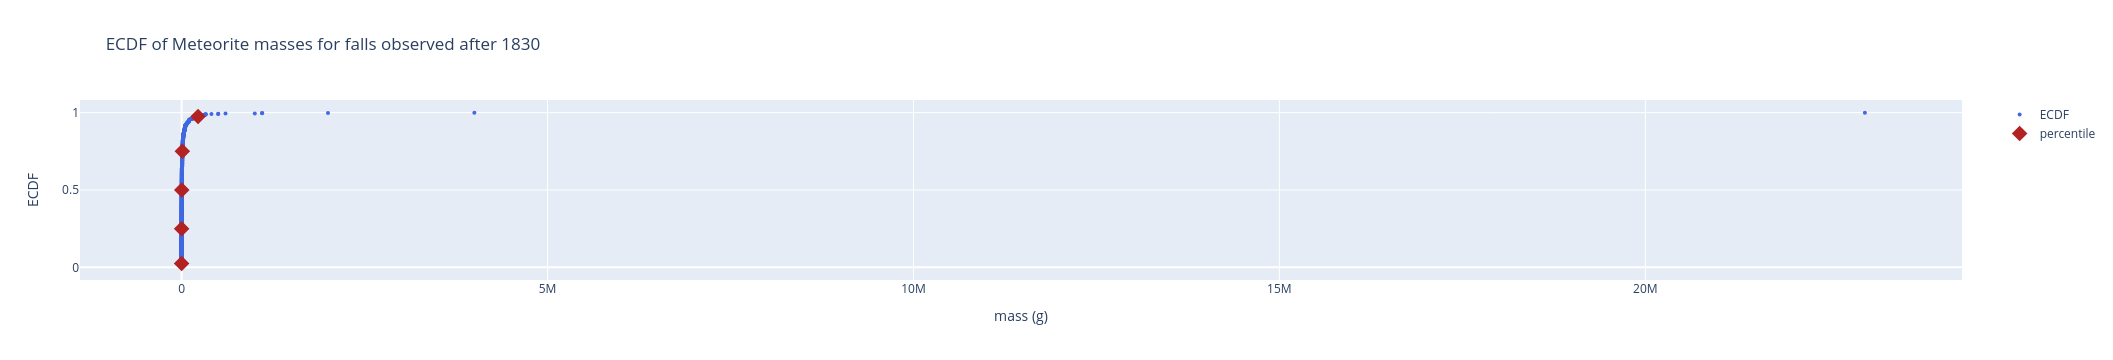

In [12]:
#plot the ecdf for the mass column

#Function to generate the sorted data for ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#Assign the mass column to an array
mass_array = df['mass (g)']

#Compute mass ecdf
x_mass, y_mass = ecdf(mass_array)

#Specify array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

#Compute percentiles
mass_perc = np.percentile(mass_array, percentiles)

#Print the result
print(mass_perc)

fig = go.Figure()

fig.add_trace(go.Scatter(mode = 'markers', x = x_mass, y = y_mass, name = 'ECDF', marker = dict(color = 'royalblue', size = 4, symbol = 'circle')))

fig.add_trace(go.Scatter(mode = 'markers', x = mass_perc, y = percentiles/100, name = 'percentile', marker = dict(color = 'firebrick', size = 12, symbol = 'diamond')))

fig.update_layout(title='ECDF of Meteorite masses for falls observed after 1830',
                   xaxis_title='mass (g)',
                   yaxis_title='ECDF')

fig.show()

heavy is a 20 meter asteroidThe ECDF and the complementary box plot below show that, within the 185 years of observed falls, there is a 25% chance that a mass is less or equal to 681.6g (~ 0.7Kg), a 50% chance that a recovered mass is less or equal to 2700g or ~3Kg (2.7Kg), 75% chance that a mass is less or equal to approx. 10Kg, and 97.5% chance that a mass that landed is less or equal to 212Kg. Moving up we can also observe that there is about 99% chance that a mass less or equal to 330Kg lands, 99.6% chance that a mass less or equal to one metric ton lands, 99.8% that a mass is less or equal to 2 metric tons, 99.9% chance for a mass less or equal to 4 metric tons. This shows that the odds that big chunks of a parent body survive the atmosphere are relatively small but this dataset is limited to only a fraction of the actual incomming bodies. It's missing in particular those meteorites that land over the sea. A true estimate of the frequency of large impactors has to be infered from other sources as well known examples (Chelyabinsk, Tunguska, Prince Edward Islands) show that they come in more frequently than what might be assumed from the current analysis. 

P.S. The estimates for the original mass of the Celyabinsk bolide are at 11000 tons and for Tunguska range from 10000 to several milion tons. 

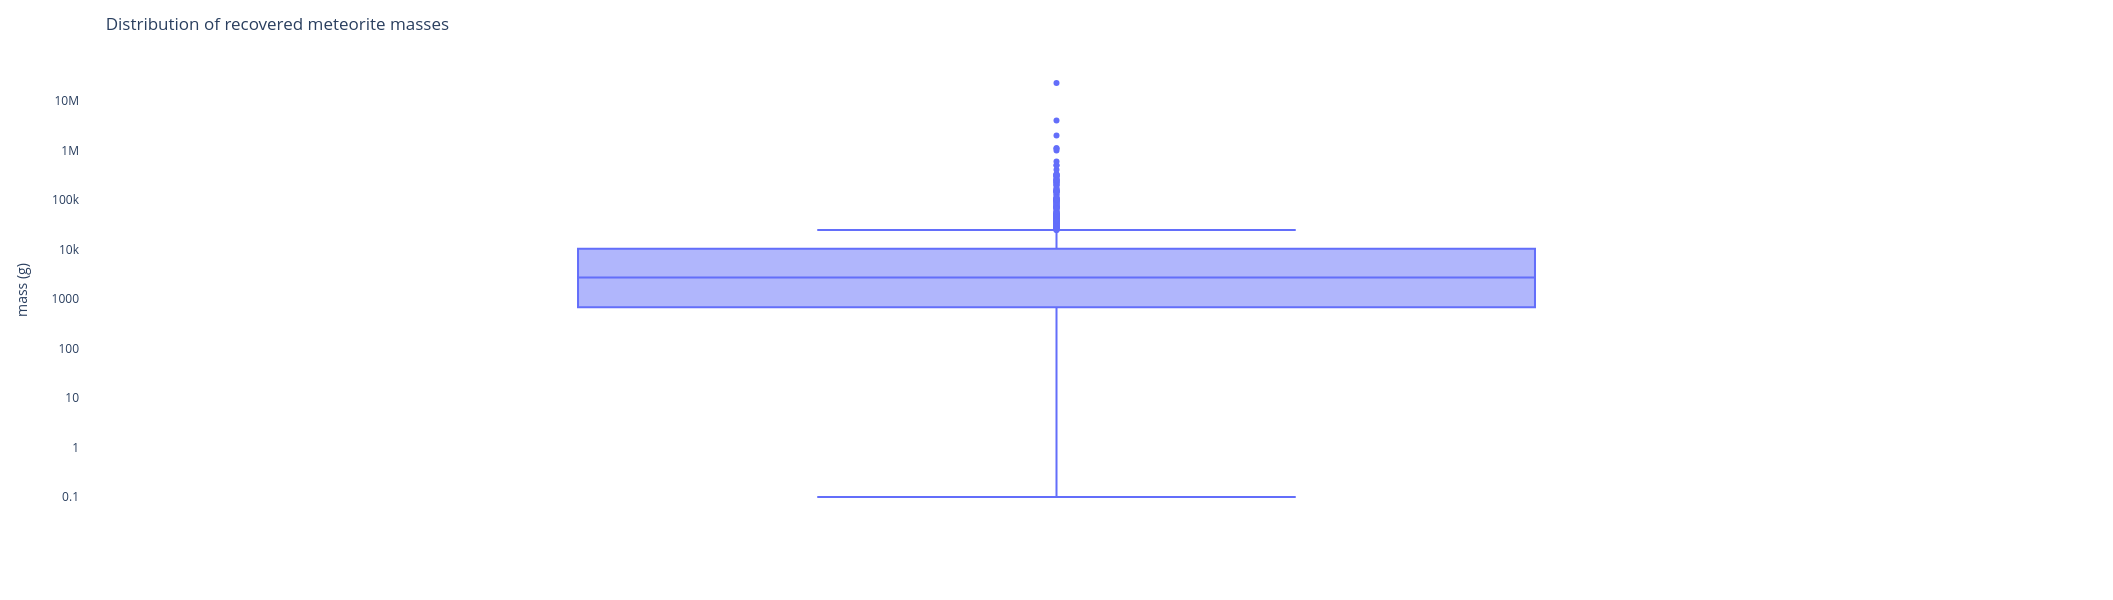

In [13]:
#plot the box plot for the new dataframe 
fig = px.box(df, y = "mass (g)", log_y = True)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)'}, height=600, width=600, 
                  title_text = 'Distribution of recovered meteorite masses')

fig.show()

From the box plot it can ba seen that the sample reduction to include only the falls recorded after 1830, did not afect the distribution significantly with a change of approximately 3.6% in the median but constant values for the min/max/q1/q3. 
 

In [14]:
#Calculate the bin width using the Freedman-Diaconis rule
q1, q3 = np.percentile(df['mass (g)'], [25, 75])
iqr = q3 - q1
bin_width = 2 * iqr / (len(df['mass (g)'])**(1/3))

#re-plot the histogram using the calculated bins
bins = np.arange(df['mass (g)'].min(), df['mass (g)'].max() + bin_width, bin_width)

In [15]:
# # Fit a Weibull distribution to the data
# x, c, loc, scale = stats.exponweib.fit(df['mass (g)'])

# # Create a frozen distribution with the fitted parameters
# dist = stats.exponweib(x, c = c, loc=loc, scale=scale)

# # Calculate the probability of a value between x1 and x2
# p = dist.cdf(2700) - dist.cdf(0.1)

# print(p)

In [16]:
len(bins)

11839

In [17]:
# # Fit an f distribution to the data
# x, a, b, loc = stats.f.fit(df['mass (g)'])

# # Create a frozen distribution with the fitted parameters
# dist = stats.f(x, a, b, loc)

# # Calculate the probability of a value between x1 and x2
# p = dist.cdf(2700) - dist.cdf(0.1)

# print(p)

In [18]:
# p_x = dist.pdf(20)

# print(p_x)

In [19]:
data = df['mass (g)']

# Fit the lognormal distribution to the mass data
shape, loc, scale = lognorm.fit(data, loc=0)

# Get the mass range selected by the user
selected_range = [0.1, 212000.0]  # Example, replace with the selected range from Streamlit slider

# Calculate the probability of the mass falling within the selected range
p = lognorm.cdf(2700, shape, loc, scale) - lognorm.cdf(0.1, shape, loc, scale)

prob = str(round(p * 100.0, 3)) + "%"

print(prob)

50.498%


In [20]:
# stats.skew(df['mass (g)'], axis = 0, bias = False)

In [21]:
# print(result.best_fit)

In [22]:
# Load the data
data = df['mass (g)']

# Box-Cox transform
transformed_data, lambda_ = stats.boxcox(data)

# Inverse transform
inverse_data = np.reciprocal(data)

# Mean and standard deviation of Box-Cox transformed data
mean_original_data = np.mean(data)
std_original_data = np.std(data)
original_skeewnes = stats.skew(data, axis = 0, bias = False)

# Mean and standard deviation of Box-Cox transformed data
mean_transformed_data = np.mean(transformed_data)
std_transformed_data = np.std(transformed_data)
transformed_skeewnes = stats.skew(transformed_data, axis = 0, bias = False)


# Mean and standard deviation of inverse transformed data
mean_inverse_data = np.mean(inverse_data)
std_inverse_data = np.std(inverse_data)
inverse_skeewnes = stats.skew(inverse_data, axis = 0, bias = False)

print('Mean of the original data: ', mean_original_data)
print('STD of the original data: ', std_original_data)
print('Skeewnes: ', original_skeewnes)

print()

print('Mean of the Box-cox transformed data: ', mean_transformed_data)
print('STD of the Box-cox transformed data: ', std_transformed_data)
print('Skeewnes: ', transformed_skeewnes)

print()

print('Mean of the inverse transformed data: ', mean_inverse_data)
print('STD of the inverse transformed data: ', std_inverse_data)
print('Skeewnes: ', inverse_skeewnes)

Mean of the original data:  51425.04559877175
STD of the original data:  752302.5374172559
Skeewnes:  29.272859361572408

Mean of the Box-cox transformed data:  8.937724795480554
STD of the Box-cox transformed data:  2.8987925391695346
Skeewnes:  0.025259069223910108

Mean of the inverse transformed data:  0.035005230440449
STD of the inverse transformed data:  0.5027979500134581
Skeewnes:  18.33810509811273


In [23]:
bin_labels = ['1st_quantile', '2nd_quantile', '3rd_quantile', '4th_quantile', '5th_quantile', '6th_quantile']

df['range label'] = pd.qcut(df['mass (g)'],
                              q=[0, .025, .25, .50, .75, 0.975, 1],
                              labels=bin_labels)
df['mass range'] = pd.qcut(df['mass (g)'],
                              q=[0, .025, .25, .50, .75, 0.975, 1])
df.head(15)

name   id                  Type         group  mass (g)  \
0                Aachen    1             Chondrite            L5      21.0   
1                Aarhus    2             Chondrite            H6     720.0   
2                  Abee    6             Chondrite           EH4  107000.0   
3              Acapulco   10  Primitive Achondrite   Acapulcoite    1914.0   
4               Achiras  370             Chondrite            L6     780.0   
5              Adhi Kot  379             Chondrite           EH4    4239.0   
6   Adzhi-Bogdo (stone)  390             Chondrite         LL3-6     910.0   
8                Aguada  398             Chondrite            L6    1620.0   
9         Aguila Blanca  417             Chondrite             L    1440.0   
10     Aioun el Atrouss  423            Achondrite  Diogenite-pm    1000.0   
11                  Aïr  424             Chondrite            L6   24000.0   
13                Akaba  426             Chondrite            L6     779.0   
14             Akbarpur  427             Chondrite            H4    1800.0   
15              Akwanga  432             Chondrite             H    3000.0   
16              Akyumak  433            Achondrite     Iron, IVA   50000.0   

      year  latitude  longitude     country      continent   range label  \
0   1880.0  50.77500    6.08333     Germany         Europe  1st_quantile   
1   1951.0  56.18333   10.23333     Denmark         Europe  3rd_quantile   
2   1952.0  54.21667 -113.00000      Canada  North America  5th_quantile   
3   1976.0  16.88333  -99.90000      Mexico  North America  3rd_quantile   
4   1902.0 -33.16667  -64.95000   Argentina  South America  3rd_quantile   
5   1919.0  32.10000   71.80000    Pakistan           Asia  4th_quantile   
6   1949.0  44.83333   95.16667    Mongolia           Asia  3rd_quantile   
8   1930.0 -31.60000  -65.23333   Argentina  South America  3rd_quantile   
9   1920.0 -30.86667  -64.55000   Argentina  South America  3rd_quantile   
10  1974.0  16.39806   -9.57028  Mauritania         Africa  3rd_quantile   
11  1925.0  19.08333    8.38333       Niger         Africa  5th_quantile   
13  1949.0  29.51667   35.05000      Jordan           Asia  3rd_quantile   
14  1838.0  29.71667   77.95000       India           Asia  3rd_quantile   
15  1959.0   8.91667    8.43333     Nigeria         Africa  4th_quantile   
16  1981.0  39.91667   42.81667      Turkey           Asia  5th_quantile   

             mass range  
0         (0.099, 22.0]  
1       (682.0, 2700.0]  
2   (10322.0, 224800.0]  
3       (682.0, 2700.0]  
4       (682.0, 2700.0]  
5     (2700.0, 10322.0]  
6       (682.0, 2700.0]  
8       (682.0, 2700.0]  
9       (682.0, 2700.0]  
10      (682.0, 2700.0]  
11  (10322.0, 224800.0]  
13      (682.0, 2700.0]  
14      (682.0, 2700.0]  
15    (2700.0, 10322.0]  
16  (10322.0, 224800.0]

In [24]:
df['mass range'].unique()

[(0.099, 22.0], (682.0, 2700.0], (10322.0, 224800.0], (2700.0, 10322.0], (22.0, 682.0], (224800.0, 23000000.0]]
Categories (6, interval[float64, right]): [(0.099, 22.0] < (22.0, 682.0] < (682.0, 2700.0] < (2700.0, 10322.0] < (10322.0, 224800.0] < (224800.0, 23000000.0]]

In [25]:
df.describe(include='category')

range label       mass range
count            977              977
unique             6                6
top     3rd_quantile  (682.0, 2700.0]
freq             244              244

In [26]:
freq_dist = df.groupby('range label', observed=True)['range label'].count().reset_index(name = 'Count')

freq_dist

range label  Count
0  1st_quantile     27
1  2nd_quantile    218
2  3rd_quantile    244
3  4th_quantile    244
4  5th_quantile    219
5  6th_quantile     25

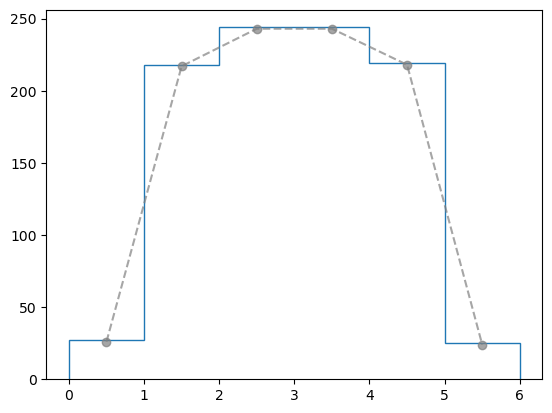

In [27]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True   # show edgecolor

bins = np.arange(7)
centers = bins[:-1] + np.diff(bins) / 2
y = freq_dist['Count']

plt.stairs(freq_dist['Count'], fill = False)
plt.plot(centers, freq_dist['Count'] - 1, 'o--', color='grey', alpha=0.7)

plt.show()

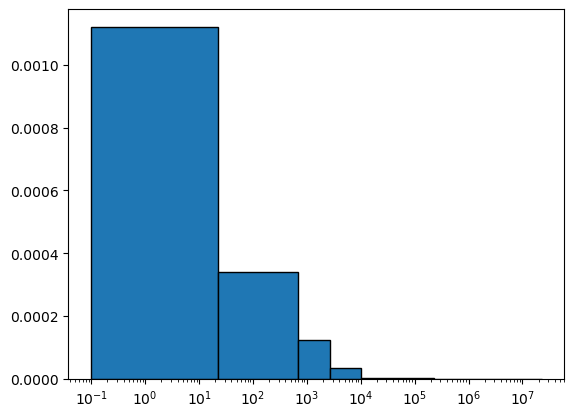

In [28]:
#sns.histplot(data = df, x  = 'mass (g)', bins = [0.099, 22.0, 682.0, 2700.0, 10322.0, 224800.0, 23000000.0])
bins = [0.099, 22.0, 682.0, 2700.0, 10322.0, 224800.0, 23000000.0]
plt.hist(x = df['mass (g)'].sort_values(), bins = bins, density = True, histtype = 'bar')
plt.xscale('log')
plt.show()

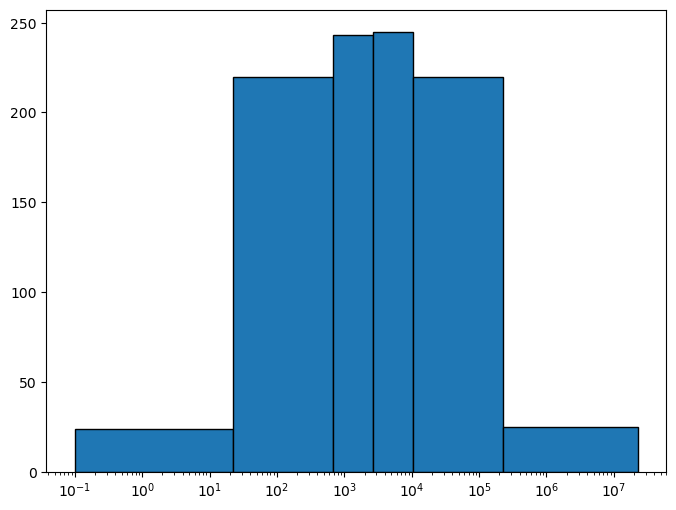

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.hist(df['mass (g)'].sort_values(), bins = [0.099, 22.0, 682.0, 2700.0, 10322.0, 224800.0, 23000000.0], histtype = 'bar')

plt.xscale('log')
plt.show()

In [30]:
#create subsets for each mass category
mass_cat1 = df[df["range label"] == "1st_quantile"]
mass_cat2 = df[df["range label"] == "2nd_quantile"]
mass_cat3 = df[df["range label"] == "3rd_quantile"]
mass_cat4 = df[df["range label"] == "4th_quantile"]
mass_cat5 = df[df["range label"] == "5th_quantile"]
mass_cat6 = df[df["range label"] == "6th_quantile"]

mass_cat2.head()

name    id        Type          group  mass (g)    year  \
17          Al Rais   446   Chondrite         CR2-an     160.0  1957.0   
21          Alberta   454   Chondrite              L     625.0  1949.0   
22  Alby sur Chéran   458  Achondrite  Eucrite-mmict     252.0  2002.0   
35        Andreevka  2296   Chondrite             L3     600.0  1969.0   
41           Aomori  2313   Chondrite             L6     320.0  1984.0   

    latitude  longitude                                country continent  \
17  24.41667   39.51667                           Saudi Arabia      Asia   
21   2.00000   22.66667  Congo, The Democratic Republic of the    Africa   
22  45.82133    6.01533                                 France    Europe   
35  48.70000   37.50000                                Ukraine    Europe   
41  40.81056  140.78556                                  Japan      Asia   

     range label     mass range  
17  2nd_quantile  (22.0, 682.0]  
21  2nd_quantile  (22.0, 682.0]  
22  2nd_quantile  (22.0, 682.0]  
35  2nd_quantile  (22.0, 682.0]  
41  2nd_quantile  (22.0, 682.0]

In [31]:
colors = ['rgb(122, 112, 108)', 'rgb(189, 91, 64)', 'rgb(199, 155, 34)', 'rgb(184, 158, 133)', 'rgb(157, 108, 132)', 
         'rgb(166, 108, 27)', 'rgb(172, 121, 93)', 'rgb(129, 84, 76)', 'rgb(234, 149, 83)', 'rgb(173, 149, 131)', 
         'rgb(214, 133, 98)', 'rgb(157, 104, 80)', 'rgb(155, 124, 107)', 'rgb(98, 108, 148)', 'rgb(100, 125, 109)', 
         'rgb(187, 112, 126)', 'rgb(200, 165, 140)', 'rgb(183, 141, 42)', 'rgb(155, 152, 104)', 'rgb(149, 157, 162)', 
         'rgb(196, 125, 94)', 'rgb(98, 107, 125)', 'rgb(131, 123, 115)', 'rgb(114, 135, 152)', 'rgb(113, 127, 138)', 
         'rgb(229, 147, 148)', 'rgb(230, 176, 13)', 'rgb(199, 110, 44)', 'rgb(224, 169, 144)', 'rgb(121, 164, 194)', 
         'rgb(181, 142, 78)', 'rgb(215, 112, 47)', 'rgb(216, 139, 118)', 'rgb(218, 190, 124)', 'rgb(128, 163, 164)', 
         'rgb(132, 180, 188)', 'rgb(132, 156, 180)', 'rgb(208, 158, 122)', 'rgb(221, 164, 98)', 'rgb(205, 115, 98)', 
         'rgb(108, 156, 156)', 'rgb(177, 175, 182)', 'rgb(192, 168, 149)', 'rgb(165, 122, 40)', 'rgb(204, 100, 76)', 
         'rgb(145, 52, 19)', 'rgb(182, 68, 116)', 'rgb(244, 212, 52)', 'rgb(164, 173, 188)', 'rgb(158, 148, 172)', 
         'rgb(204, 140, 122)', 'rgb(193, 146, 111)', 'rgb(194, 164, 71)', 'rgb(153, 154, 44)', 'rgb(175, 141, 100)', 
         'rgb(142, 104, 40)', 'rgb(182, 95, 86)', 'rgb(143, 144, 148)', 'rgb(186, 87, 29)', 'rgb(173, 80, 53)', 
         'rgb(132, 124, 164)', 'rgb(217, 165, 152)', 'rgb(205, 182, 135)', 'rgb(212, 92, 60)', 'rgb(217, 134, 78)', 
         'rgb(189, 127, 15)', 'rgb(84, 168, 98)', 'rgb(196, 140, 174)', 'rgb(148, 133, 121)', 'rgb(169, 159, 31)', 
         'rgb(204, 182, 98)', 'rgb(239, 163, 122)', 'rgb(174, 66, 17)', 'rgb(84, 140, 178)', 'rgb(178, 163, 155)',
         'rgb(186, 134, 118)', 'rgb(201, 136, 4)', 'rgb(132, 184, 212)', 'rgb(199, 162, 96)', 'rgb(229, 111, 96)',
         'rgb(218, 190, 124)', 'rgb(121, 164, 194)', 'rgb(149, 157, 162)', 'rgb(196, 125, 94)', 'rgb(132, 124, 164)', 
         'rgb(215, 112, 47)', 'rgb(145, 52, 19)', 'rgb(186, 87, 29)', 'rgb(142, 104, 40)', 'rgb(84, 168, 98)', 
         'rgb(100, 125, 109)', 'rgb(84, 140, 178)', 'rgb(229, 111, 96)', 'rgb(244, 212, 52)', 'rgb(178, 163, 155)', 
         'rgb(177, 175, 182)', 'rgb(205, 115, 98)', 'rgb(132, 180, 188)', 'rgb(234, 149, 83)', 'rgb(143, 144, 148)', 
         'rgb(172, 121, 93)', 'rgb(204, 140, 122)', 'rgb(239, 163, 122)', 'rgb(182, 68, 116)', 'rgb(194, 164, 71)',
         'rgb(201, 136, 4)', 'rgb(175, 141, 100)', 'rgb(129, 84, 76)', 'rgb(204, 100, 76)', 'rgb(187, 112, 126)',
         'rgb(212, 92, 60)', 'rgb(173, 149, 131)', 'rgb(157, 108, 132)', 'rgb(98, 107, 125)', 'rgb(217, 165, 152)', 
         'rgb(186, 134, 118)', 'rgb(157, 104, 80)', 'rgb(192, 168, 149)', 'rgb(169, 159, 31)', 'rgb(132, 184, 212)', 
         'rgb(174, 66, 17)', 'rgb(204, 182, 98)', 'rgb(208, 158, 122)', 'rgb(184, 158, 133)', 'rgb(229, 147, 148)', 
         'rgb(114, 135, 152)', 'rgb(193, 146, 111)', 'rgb(221, 164, 98)', 'rgb(199, 110, 44)', 'rgb(128, 163, 164)', 
         'rgb(165, 122, 40)', 'rgb(196, 140, 174)', 'rgb(148, 133, 121)', 'rgb(98, 108, 148)', 'rgb(108, 156, 156)', 
         'rgb(224, 169, 144)', 'rgb(155, 124, 107)', 'rgb(200, 165, 140)', 'rgb(155, 152, 104)', 'rgb(113, 127, 138)', 
         'rgb(216, 139, 118)', 'rgb(122, 112, 108)', 'rgb(199, 155, 34)', 'rgb(132, 156, 180)', 'rgb(173, 80, 53)', 
         'rgb(189, 127, 15)', 'rgb(166, 108, 27)', 'rgb(217, 134, 78)', 'rgb(183, 141, 42)', 'rgb(214, 133, 98)', 
         'rgb(153, 154, 44)', 'rgb(131, 123, 115)', 'rgb(230, 176, 13)', 'rgb(205, 182, 135)', 'rgb(158, 148, 172)', 
         'rgb(182, 95, 86)', 'rgb(164, 173, 188)', 'rgb(199, 162, 96)', 'rgb(189, 91, 64)', 'rgb(181, 142, 78)',
         'rgb(177, 175, 182)', 'rgb(200, 165, 140)', 'rgb(174, 66, 17)', 'rgb(164, 173, 188)', 'rgb(142, 104, 40)', 'rgb(215, 112, 47)', 
         'rgb(178, 163, 155)', 'rgb(230, 176, 13)', 'rgb(184, 158, 133)', 'rgb(229, 147, 148)', 'rgb(244, 212, 52)', 'rgb(234, 149, 83)', 
         'rgb(204, 182, 98)', 'rgb(205, 182, 135)', 'rgb(84, 168, 98)', 'rgb(157, 108, 132)', 'rgb(204, 140, 122)', 'rgb(212, 92, 60)', 
         'rgb(175, 141, 100)', 'rgb(186, 87, 29)', 'rgb(148, 133, 121)', 'rgb(214, 133, 98)', 'rgb(186, 134, 118)', 'rgb(196, 140, 174)', 
         'rgb(169, 159, 31)', 'rgb(121, 164, 194)', 'rgb(158, 148, 172)', 'rgb(157, 104, 80)', 'rgb(192, 168, 149)', 'rgb(153, 154, 44)', 
         'rgb(224, 169, 144)', 'rgb(129, 84, 76)', 'rgb(100, 125, 109)', 'rgb(183, 141, 42)', 'rgb(132, 180, 188)', 'rgb(182, 68, 116)', 
         'rgb(181, 142, 78)', 'rgb(84, 140, 178)', 'rgb(145, 52, 19)', 'rgb(194, 164, 71)', 'rgb(165, 122, 40)', 'rgb(131, 123, 115)', 
         'rgb(182, 95, 86)', 'rgb(216, 139, 118)', 'rgb(187, 112, 126)', 'rgb(229, 111, 96)', 'rgb(173, 149, 131)', 'rgb(122, 112, 108)', 
         'rgb(239, 163, 122)', 'rgb(132, 124, 164)', 'rgb(196, 125, 94)', 'rgb(201, 136, 4)', 'rgb(221, 164, 98)', 'rgb(143, 144, 148)', 
         'rgb(155, 124, 107)', 'rgb(132, 156, 180)', 'rgb(217, 134, 78)', 'rgb(172, 121, 93)', 'rgb(189, 91, 64)', 'rgb(204, 100, 76)', 
         'rgb(155, 152, 104)', 'rgb(98, 108, 148)', 'rgb(132, 184, 212)', 'rgb(173, 80, 53)', 'rgb(199, 110, 44)', 'rgb(199, 155, 34)', 
         'rgb(217, 165, 152)', 'rgb(193, 146, 111)', 'rgb(98, 107, 125)', 'rgb(218, 190, 124)', 'rgb(108, 156, 156)', 'rgb(114, 135, 152)', 
         'rgb(205, 115, 98)', 'rgb(149, 157, 162)', 'rgb(189, 127, 15)', 'rgb(113, 127, 138)', 'rgb(166, 108, 27)', 'rgb(208, 158, 122)', 
         'rgb(128, 163, 164)', 'rgb(199, 162, 96)', 'rgb(145, 52, 19)', 'rgb(186, 87, 29)', 'rgb(182, 68, 116)', 'rgb(217, 134, 78)',
          'rgb(108, 156, 156)', 'rgb(178, 163, 155)', 'rgb(173, 149, 131)', 'rgb(164, 173, 188)', 'rgb(221, 164, 98)', 'rgb(84, 168, 98)',
          'rgb(194, 164, 71)', 'rgb(181, 142, 78)', 'rgb(132, 124, 164)', 'rgb(205, 182, 135)', 'rgb(158, 148, 172)', 'rgb(165, 122, 40)',
          'rgb(229, 147, 148)', 'rgb(184, 158, 133)', 'rgb(204, 100, 76)', 'rgb(218, 190, 124)', 'rgb(132, 184, 212)', 'rgb(114, 135, 152)',
          'rgb(183, 141, 42)', 'rgb(128, 163, 164)', 'rgb(157, 108, 132)', 'rgb(199, 162, 96)', 'rgb(132, 156, 180)', 'rgb(148, 133, 121)',
          'rgb(193, 146, 111)', 'rgb(153, 154, 44)', 'rgb(143, 144, 148)', 'rgb(204, 182, 98)', 'rgb(100, 125, 109)', 'rgb(192, 168, 149)',
          'rgb(169, 159, 31)', 'rgb(113, 127, 138)', 'rgb(234, 149, 83)', 'rgb(149, 157, 162)', 'rgb(129, 84, 76)', 'rgb(132, 180, 188)',
          'rgb(199, 110, 44)', 'rgb(155, 124, 107)', 'rgb(196, 140, 174)', 'rgb(199, 155, 34)', 'rgb(214, 133, 98)', 'rgb(212, 92, 60)',
          'rgb(155, 152, 104)', 'rgb(121, 164, 194)', 'rgb(189, 127, 15)', 'rgb(217, 165, 152)', 'rgb(215, 112, 47)', 'rgb(122, 112, 108)',
          'rgb(174, 66, 17)', 'rgb(224, 169, 144)', 'rgb(182, 95, 86)', 'rgb(175, 141, 100)', 'rgb(189, 91, 64)', 'rgb(166, 108, 27)',
          'rgb(196, 125, 94)', 'rgb(200, 165, 140)', 'rgb(205, 115, 98)', 'rgb(173, 80, 53)', 'rgb(229, 111, 96)', 'rgb(98, 108, 148)',
          'rgb(98, 107, 125)', 'rgb(131, 123, 115)', 'rgb(244, 212, 52)', 'rgb(239, 163, 122)', 'rgb(84, 140, 178)', 'rgb(177, 175, 182)',
          'rgb(157, 104, 80)', 'rgb(204, 140, 122)', 'rgb(208, 158, 122)', 'rgb(187, 112, 126)', 'rgb(230, 176, 13)', 'rgb(172, 121, 93)',
          'rgb(201, 136, 4)', 'rgb(186, 134, 118)', 'rgb(142, 104, 40)', 'rgb(216, 139, 118)'] 

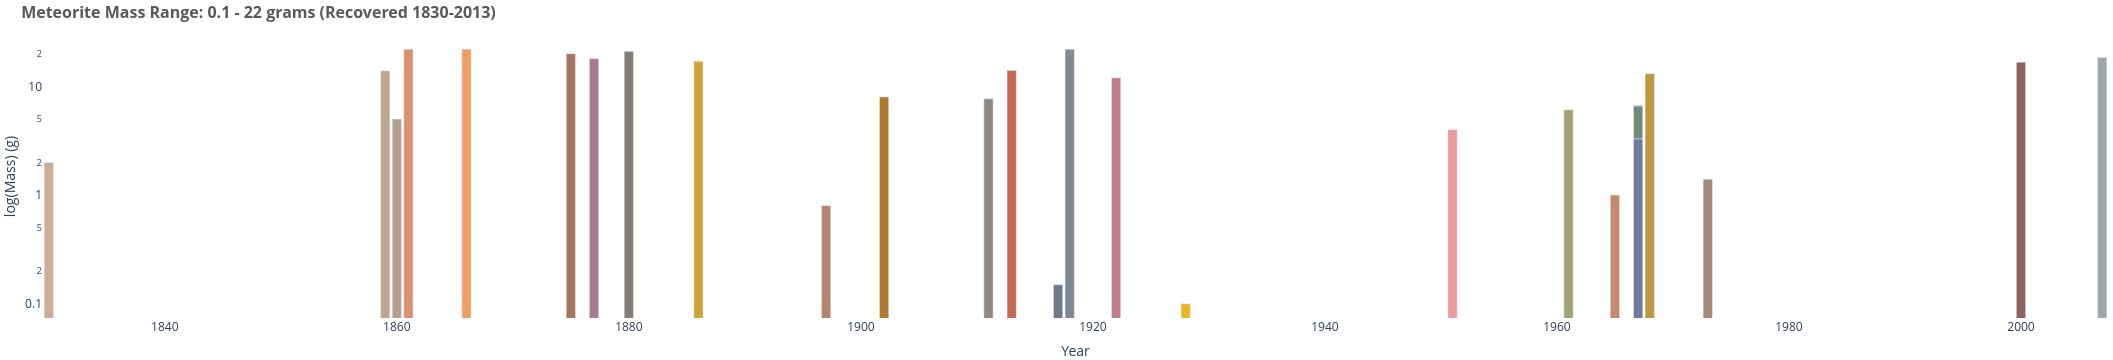

In [32]:
colors = colors,

fig = px.bar(mass_cat1, 
 x="year",
 y = "mass (g)",
             log_y = True,
 color_discrete_sequence = colors,                         
 opacity = 0.9,                                                     
    )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Meteorite Mass Range: 0.1 - 22 grams (Recovered 1830-2013) </b>'),
    title_font_color='rgb(89, 89, 89)',
    title_font_size=16,
    title_x = 0.01,                
    xaxis_title='Year',
    yaxis_title='log(Mass) (g)',                
    margin=dict(t=35, b=10, l=0, r=5)
)    

fig.show()

In [33]:
mass_cat1["mass (g)"][mass_cat1["mass (g)"] > 10].count() / mass_cat1.shape[0]

0.48148148148148145

In [34]:
mass_cat1["mass (g)"][mass_cat1["mass (g)"] < 10].count() / mass_cat1.shape[0]

0.5185185185185185

In [35]:
display(mass_cat1[mass_cat1['mass (g)'] > 10])
display(mass_cat1[(mass_cat1['mass (g)'] >= 1) & (mass_cat1['mass (g)'] < 10)])

name     id          Type       group  mass (g)    year  \
0              Aachen      1     Chondrite          L5     21.00  1880.0   
72            Banswal   4937     Chondrite          L5     14.00  1913.0   
78           Barntrup   4948     Chondrite         LL4     17.00  1886.0   
104         Bethlehem   5032     Chondrite           H     13.90  1859.0   
107            Bhagur   5037     Chondrite          L6     18.00  1877.0   
323     Gasseltepaoua  10866     Chondrite          H5     16.70  2000.0   
410          Jamkheir  12072     Chondrite          H6     22.00  1866.0   
604            Meerut  15469     Chondrite          H5     22.00  1861.0   
666           Nagaria  16892    Achondrite  Eucrite-cm     20.00  1875.0   
766             Patti  18118  Unclassified        Iron     12.00  1922.0   
789       Piancaldoli  18813     Chondrite       LL3.4     13.10  1968.0   
837   Red Canyon Lake  53502     Chondrite          H5     18.41  2007.0   
1067     Witklip Farm  24321     Chondrite          H5     22.00  1918.0   

      latitude  longitude        country      continent   range label  \
0     50.77500    6.08333        Germany         Europe  1st_quantile   
72    30.40000   78.20000          India           Asia  1st_quantile   
78    52.00000    9.10000        Germany         Europe  1st_quantile   
104   42.53333  -73.83333  United States  North America  1st_quantile   
107   20.88333   74.83333          India           Asia  1st_quantile   
323   14.15083   -2.04167   Burkina Faso         Africa  1st_quantile   
410   18.75000   75.33333          India           Asia  1st_quantile   
604   29.01667   77.80000          India           Asia  1st_quantile   
666   26.98333   78.21667          India           Asia  1st_quantile   
766   38.13333   14.96667          Italy         Europe  1st_quantile   
789   44.24417   11.50222          Italy         Europe  1st_quantile   
837   38.13742 -119.75812  United States  North America  1st_quantile   
1067 -26.00000   30.00000   South Africa         Africa  1st_quantile   

         mass range  
0     (0.099, 22.0]  
72    (0.099, 22.0]  
78    (0.099, 22.0]  
104   (0.099, 22.0]  
107   (0.099, 22.0]  
323   (0.099, 22.0]  
410   (0.099, 22.0]  
604   (0.099, 22.0]  
666   (0.099, 22.0]  
766   (0.099, 22.0]  
789   (0.099, 22.0]  
837   (0.099, 22.0]  
1067  (0.099, 22.0]

name     id          Type       group  mass (g)    year  \
169      Caratash   5265     Chondrite         LL6       8.0  1902.0   
507       Kusiali  12382     Chondrite          L6       5.0  1860.0   
679         Natal  16923  Unclassified  Stone-uncl       1.4  1973.0   
692    Niger (L6)  16974     Chondrite          L6       3.3  1967.0   
693   Niger (LL6)  16975     Chondrite         LL6       3.3  1967.0   
779         Perth  18797     Chondrite         LL5       2.0  1830.0   
834    Ras Tanura  22395     Chondrite          H6       6.1  1961.0   
844    Revelstoke  22592     Chondrite         CI1       1.0  1965.0   
999          Tonk  24026     Chondrite         CI1       7.7  1911.0   
1079        Yambo  30345     Chondrite          H5       4.0  1951.0   

       latitude   longitude                                country  \
169   38.500000   27.000000                                 Turkey   
507   29.683330   78.383330                                  India   
679  -30.572498   30.572498                           South Africa   
692   13.714550    9.158560                                  Niger   
693   13.714550    9.158560                                  Niger   
779   56.400000   -3.433330                         United Kingdom   
834   26.666670   50.150000                           Saudi Arabia   
844   51.333330 -118.950000                                 Canada   
999   24.650000   76.866670                                  India   
1079   1.000000   22.500000  Congo, The Democratic Republic of the   

          continent   range label     mass range  
169            Asia  1st_quantile  (0.099, 22.0]  
507            Asia  1st_quantile  (0.099, 22.0]  
679          Africa  1st_quantile  (0.099, 22.0]  
692          Africa  1st_quantile  (0.099, 22.0]  
693          Africa  1st_quantile  (0.099, 22.0]  
779          Europe  1st_quantile  (0.099, 22.0]  
834            Asia  1st_quantile  (0.099, 22.0]  
844   North America  1st_quantile  (0.099, 22.0]  
999            Asia  1st_quantile  (0.099, 22.0]  
1079         Africa  1st_quantile  (0.099, 22.0]

In [36]:
mass_cat1[(mass_cat1['mass (g)'] >= 0) & (mass_cat1['mass (g)'] < 1)].count() / mass_cat1.shape[0]

name           0.148148
id             0.148148
Type           0.148148
group          0.148148
mass (g)       0.148148
year           0.148148
latitude       0.148148
longitude      0.148148
country        0.148148
continent      0.148148
range label    0.148148
mass range     0.148148
dtype: float64

In [37]:
mass_cat1[(mass_cat1['mass (g)'] >= 1) & (mass_cat1['mass (g)'] < 10)].count() / mass_cat1.shape[0]

name           0.37037
id             0.37037
Type           0.37037
group          0.37037
mass (g)       0.37037
year           0.37037
latitude       0.37037
longitude      0.37037
country        0.37037
continent      0.37037
range label    0.37037
mass range     0.37037
dtype: float64

In [38]:
mass_cat1[(mass_cat1['mass (g)'] >= 10) & (mass_cat1['mass (g)'] < 20)].count() / mass_cat1.shape[0]

name           0.296296
id             0.296296
Type           0.296296
group          0.296296
mass (g)       0.296296
year           0.296296
latitude       0.296296
longitude      0.296296
country        0.296296
continent      0.296296
range label    0.296296
mass range     0.296296
dtype: float64

In [39]:
mass_cat1[(mass_cat1['mass (g)'] >= 20) & (mass_cat1['mass (g)'] < 30)].count() / mass_cat1.shape[0]

name           0.185185
id             0.185185
Type           0.185185
group          0.185185
mass (g)       0.185185
year           0.185185
latitude       0.185185
longitude      0.185185
country        0.185185
continent      0.185185
range label    0.185185
mass range     0.185185
dtype: float64

In [40]:
mass_cat1.replace([np.inf, -np.inf], np.nan)

name     id          Type           group  mass (g)    year  \
0              Aachen      1     Chondrite              L5     21.00  1880.0   
72            Banswal   4937     Chondrite              L5     14.00  1913.0   
78           Barntrup   4948     Chondrite             LL4     17.00  1886.0   
104         Bethlehem   5032     Chondrite               H     13.90  1859.0   
107            Bhagur   5037     Chondrite              L6     18.00  1877.0   
169          Caratash   5265     Chondrite             LL6      8.00  1902.0   
230             Delhi   6642     Chondrite              L5      0.80  1897.0   
323     Gasseltepaoua  10866     Chondrite              H5     16.70  2000.0   
410          Jamkheir  12072     Chondrite              H6     22.00  1866.0   
507           Kusiali  12382     Chondrite              L6      5.00  1860.0   
604            Meerut  15469     Chondrite              H5     22.00  1861.0   
666           Nagaria  16892    Achondrite      Eucrite-cm     20.00  1875.0   
679             Natal  16923  Unclassified      Stone-uncl      1.40  1973.0   
692        Niger (L6)  16974     Chondrite              L6      3.30  1967.0   
693       Niger (LL6)  16975     Chondrite             LL6      3.30  1967.0   
766             Patti  18118  Unclassified            Iron     12.00  1922.0   
779             Perth  18797     Chondrite             LL5      2.00  1830.0   
789       Piancaldoli  18813     Chondrite           LL3.4     13.10  1968.0   
834        Ras Tanura  22395     Chondrite              H6      6.10  1961.0   
837   Red Canyon Lake  53502     Chondrite              H5     18.41  2007.0   
844        Revelstoke  22592     Chondrite             CI1      1.00  1965.0   
918          Silistra  55584    Achondrite  Achondrite-ung      0.15  1917.0   
999              Tonk  24026     Chondrite             CI1      7.70  1911.0   
1051            Vilna  24183     Chondrite              L5      0.10  1967.0   
1067     Witklip Farm  24321     Chondrite              H5     22.00  1918.0   
1079            Yambo  30345     Chondrite              H5      4.00  1951.0   
1086          Yoshiki  30372  Unclassified      Stone-uncl      0.10  1928.0   

       latitude   longitude                                country  \
0     50.775000    6.083330                                Germany   
72    30.400000   78.200000                                  India   
78    52.000000    9.100000                                Germany   
104   42.533330  -73.833330                          United States   
107   20.883330   74.833330                                  India   
169   38.500000   27.000000                                 Turkey   
230   28.566670   77.250000                                  India   
323   14.150830   -2.041670                           Burkina Faso   
410   18.750000   75.333330                                  India   
507   29.683330   78.383330                                  India   
604   29.016670   77.800000                                  India   
666   26.983330   78.216670                                  India   
679  -30.572498   30.572498                           South Africa   
692   13.714550    9.158560                                  Niger   
693   13.714550    9.158560                                  Niger   
766   38.133330   14.966670                                  Italy   
779   56.400000   -3.433330                         United Kingdom   
789   44.244170   11.502220                                  Italy   
834   26.666670   50.150000                           Saudi Arabia   
837   38.137420 -119.758120                          United States   
844   51.333330 -118.950000                                 Canada   
918   44.116670   27.266670                               Bulgaria   
999   24.650000   76.866670                                  India   
1051  54.225000 -111.691670                                 Canada   
1067 -26.000000   30.00000

In [41]:
mass_cat1['mass (g)'].describe(percentiles = [.025, .25, .50, .75, 0.975])

count    27.000000
mean     10.113333
std       8.081350
min       0.100000
2.5%      0.100000
25%       2.650000
50%       8.000000
75%      17.500000
97.5%    22.000000
max      22.000000
Name: mass (g), dtype: float64

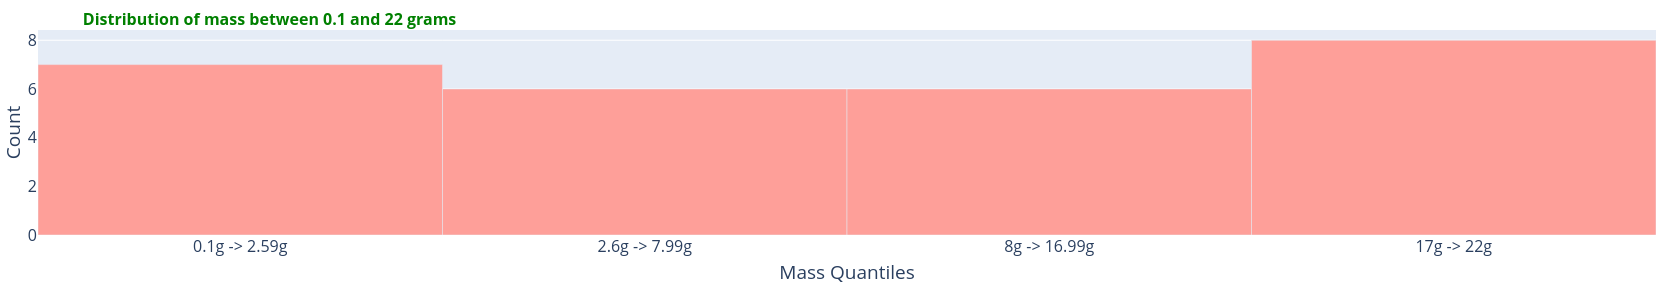

In [72]:
import plotly.graph_objects as go
import numpy as np

hist, bins = np.histogram(mass_cat1["mass (g)"], bins=[0.1, 2.6, 8, 17, 22])
    
fig = go.Figure(go.Bar(x=[0,1,2,3], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3], ticktext=['0.1g -> 2.59g','2.6g -> 7.99g','8g -> 16.99g', '17g -> 22g'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 0.1 and 22 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )               

fig.show()


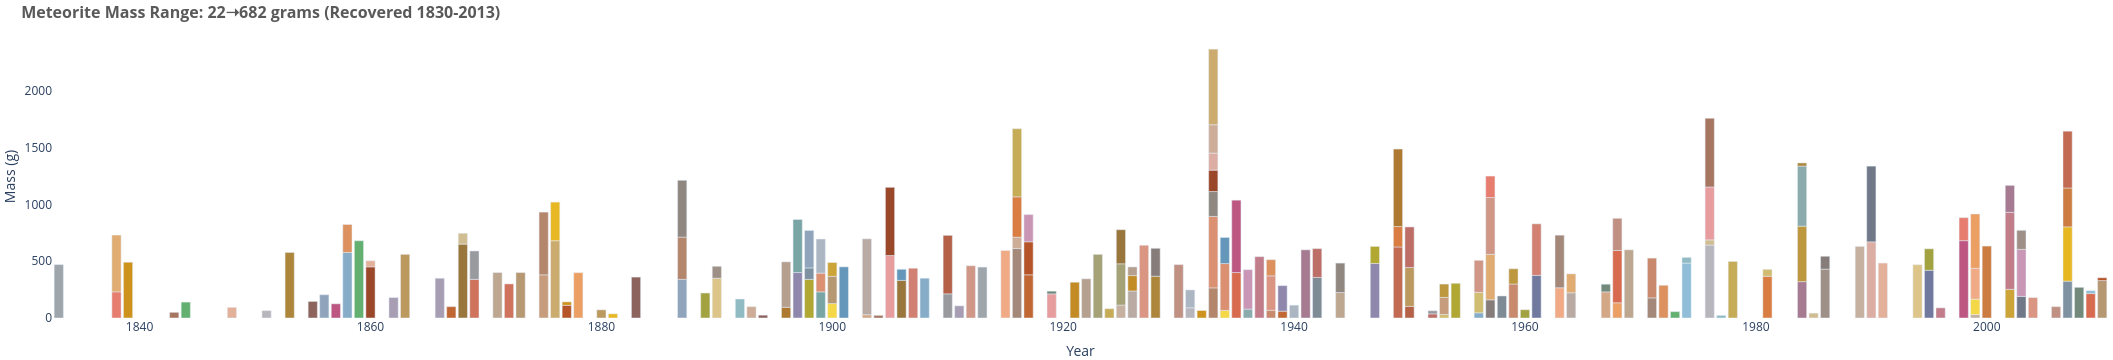

In [43]:
colors = colors

fig = px.bar(mass_cat2,
             x="year",
             y = "mass (g)",
             color_discrete_sequence = colors,  
             opacity = 0.9,
             )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Meteorite Mass Range: 22➝682 grams (Recovered 1830-2013) </b>'),
    title_font_color='rgb(89, 89, 89)',
    title_font_size=16,
    title_x = 0.01,     
    xaxis_title='Year',
    yaxis_title='Mass (g)',                
    margin=dict(t=35, b=10, l=0, r=5)
    )    

fig.show()

In [44]:
pd.set_option('display.max_rows', None)

display(mass_cat2[(mass_cat2['mass (g)'] >= 450) & (mass_cat2['mass (g)'] <= 682)].sort_values(by = 'mass (g)'))

name     id          Type       group  mass (g)    year  \
413            Jemlapur  12079     Chondrite          L6     450.0  1901.0   
471            Kheragur  12294     Chondrite          L6     450.0  1860.0   
501               Kulak  12369     Chondrite          L5     453.6  1961.0   
876   San Pedro Jacuaro  34063     Chondrite         LL6     460.0  1968.0   
532        Leeuwfontein  12756     Chondrite          L6     460.0  1912.0   
1093             Zaisan  30388     Chondrite          H5     463.0  1963.0   
859            Ruhobobo  22780     Chondrite          L6     465.5  1976.0   
698                 Nio  16982     Chondrite        H3-4     467.0  1897.0   
210             Coleman   5401     Chondrite          L6     469.0  1994.0   
124             Blansko   5072     Chondrite          H6     470.0  1833.0   
575           Malampaka  15395     Chondrite           H     470.0  1930.0   
864              Sabrum  22793     Chondrite         LL6     478.0  1999.0   
159                Cali  45976     Chondrite        H/L4     478.0  2007.0   
327             Git-Git  10919     Chondrite          L6     480.0  1947.0   
422             Jolomba  12199     Chondrite         LL6     483.0  1974.0   
701         Noblesville  16985     Chondrite        H4-6     483.7  1991.0   
115           Binningup   5051     Chondrite          H5     488.1  1984.0   
544        Little Piney  14664     Chondrite          L5     491.0  1839.0   
542              Lishui  14659     Chondrite          L5     498.0  1978.0   
289              Essebi  10055     Chondrite      C2-ung     500.0  1957.0   
642         Montlivault  16729     Chondrite          L6     500.0  1838.0   
786            Phu Hong  18809     Chondrite          H4     500.0  1887.0   
811       Puerto Lápice  45984    Achondrite  Eucrite-br     500.0  2007.0   
749              Paitan  18072     Chondrite          H6     515.0  1910.0   
673             Nantong  16907     Chondrite          H6     529.0  1984.0   
561        Mabwe-Khoywa  14764     Chondrite          L5     540.0  1937.0   
628          Minnichhof  16700     Chondrite          OC     550.0  1905.0   
1105            Zsadany  30413     Chondrite          H5     552.0  1875.0   
812             Pulsora  18899     Chondrite          H5     560.0  1863.0   
116       Birni N'konni   5056     Chondrite          H4     560.0  1923.0   
263              Duruma   7752     Chondrite          L6     577.0  1853.0   
438              Kakowa  12231     Chondrite          L6     577.0  1858.0   
1055             Visuni  24189     Chondrite          H6     594.0  1915.0   
568               Mafra  15383     Chondrite        L3-4     600.0  1941.0   
997              Tomita  24023     Chondrite           L     600.0  1916.0   
995           Tomakovka  24019     Chondrite         LL6     600.0  1905.0   
35            Andreevka   2296     Chondrite          L3     600.0  1969.0   
910             Sheyang  23531     Chondrite          L6     605.0  1976.0   
87               Baxter   4977     Chondrite          L6     611.0  1916.0   
21              Alberta    454     Chondrite           L     625.0  1949.0   
73               Banten   4938     Chondrite         CM2     629.0  1933.0   
926          Sixiangkou  23619     Chondrite          L5     630.0  1989.0   
648             Morávka  16742     Chondrite          H5     633.0  2000.0   
963             Sungach  23745     Chondrite          H5     637.0  1935.0   
1010             Trysil  24057     Chondrite       L/LL6     640.0  1927.0   
255                Dowa   7725  Unclassified  Stone-uncl     642.0  1976.0   
308   Frankfort (stone)  10177    Achondrite   Howardite     650.0  1868.0   
807        Po-wang Chen  18879     Chondrite          LL     665.0  1933.0   
570          Magombedze  15387     Chondrite        H3-5     666.6  1990.0   
846       Rich Mountain  22597     Chondrite          L6     668.0  1903.0   
328          Glanerbrug  10923     Chondr

In [45]:
summary2 = pd.DataFrame({'mass (g)': mass_cat2["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975])}).reset_index(names = 'Statistic')

display(summary2)

print()

# calculate the 97.5th percentile value
percentile_val_75 = mass_cat2['mass (g)'].quantile(0.75)
percentile_val_97 = mass_cat2['mass (g)'].quantile(0.975)

# count the number of values above the 97.5th percentile
num_above_percentile_75 = len(mass_cat2[mass_cat2['mass (g)'] >= percentile_val_75])
num_above_percentile_97 = len(mass_cat2[mass_cat2['mass (g)'] >= percentile_val_97])

print(f"Number of values above or equal to the 75th percentile: {num_above_percentile_75}")
print(f"Number of values above or equal to the 97.5th percentile: {num_above_percentile_97}")

Statistic    mass (g)
0     count  218.000000
1      mean  296.880963
2       std  190.900542
3       min   23.000000
4      2.5%   26.528250
5       25%  128.750000
6       50%  270.700000
7       75%  450.000000
8     97.5%  669.150000
9       max  682.000000


Number of values above or equal to the 75th percentile: 56
Number of values above or equal to the 97.5th percentile: 6


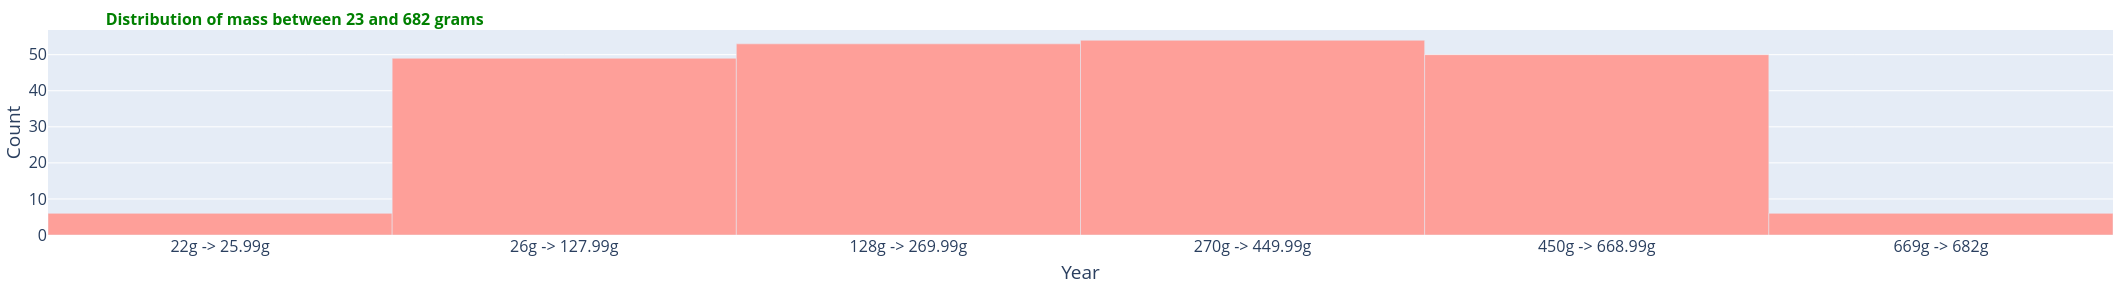

In [68]:
hist, bins = np.histogram(mass_cat2["mass (g)"], bins=[22, 26, 128, 270, 450, 669.15, 682])
    
fig = go.Figure(go.Bar(x=[0,1,2,3, 4, 5], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3, 4, 5], ticktext=['22g -> 25.99g', '26g -> 127.99g','128g -> 269.99g','270g -> 449.99g','450g -> 668.99g', '669g -> 682g'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 23 and 682 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )               

fig.show()

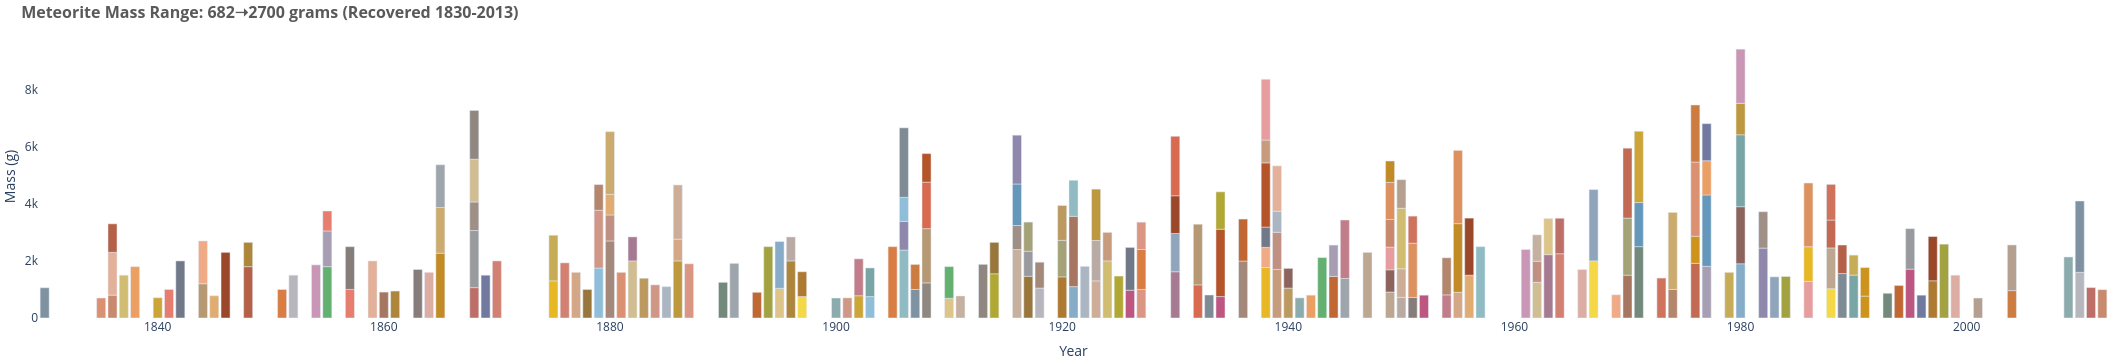

In [47]:
colors = colors

fig = px.bar(mass_cat3, 
             x="year",
             y = "mass (g)",
             color_discrete_sequence = colors,                         
             opacity = 0.9,                                                            
                )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Meteorite Mass Range: 690➝2700 grams (Recovered 1830-2013) </b>'),
    title_font_color='rgb(89, 89, 89)',
    title_font_size=16,
    title_x = 0.01,     
    xaxis_title='Year',
    yaxis_title='Mass (g)',                
    margin=dict(t=35, b=10, l=0, r=5)
)                    

fig.show()

In [48]:
summary3 = pd.DataFrame({'mass (g)': mass_cat3["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975])}).reset_index(names = 'Statistic')

display(summary3)

print()

# calculate the 97.5th percentile value
percentile_val_75 = mass_cat3['mass (g)'].quantile(0.75)
percentile_val_97 = mass_cat3['mass (g)'].quantile(0.975)

# count the number of values above the 97.5th percentile
num_above_percentile_75 = len(mass_cat3[mass_cat3['mass (g)'] >= percentile_val_75])
num_above_percentile_97 = len(mass_cat3[mass_cat3['mass (g)'] >= percentile_val_97])

print(f"Number of values above or equal to the 75th percentile: {num_above_percentile_75}")
print(f"Number of values above or equal to the 97.5th percentile: {num_above_percentile_97}")

Statistic     mass (g)
0     count   244.000000
1      mean  1439.547295
2       std   552.315511
3       min   690.000000
4      2.5%   700.337500
5       25%   988.625000
6       50%  1363.100000
7       75%  1900.000000
8     97.5%  2500.000000
9       max  2700.000000


Number of values above or equal to the 75th percentile: 62
Number of values above or equal to the 97.5th percentile: 14


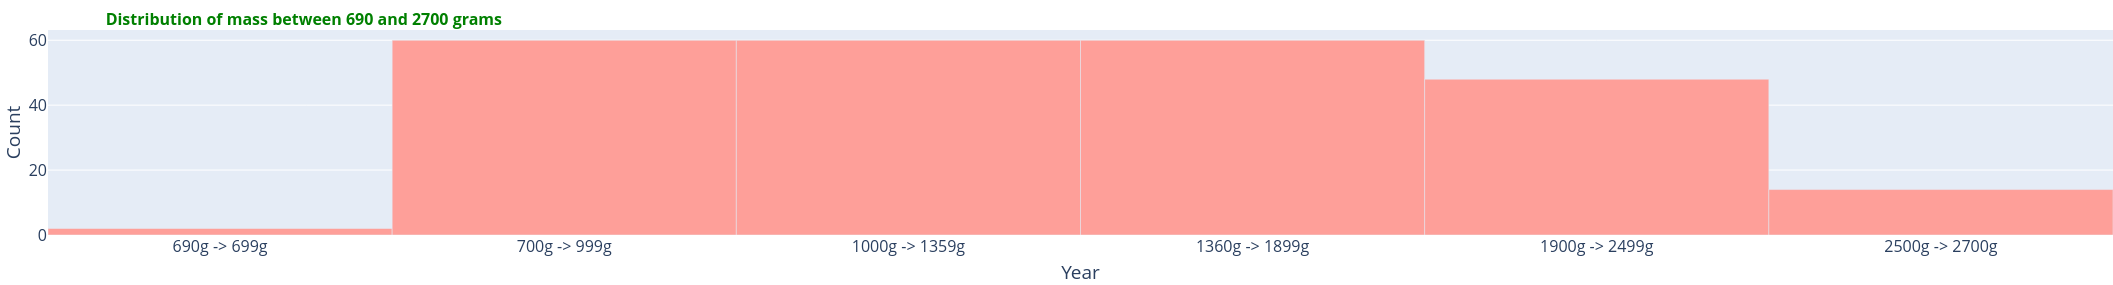

In [67]:
hist, bins = np.histogram(mass_cat3["mass (g)"], bins=[689, 699, 999, 1359, 1899, 2499, 2701])
    
fig = go.Figure(go.Bar(x=[0,1,2,3, 4, 5], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3, 4, 5], ticktext=['690g -> 699g', '700g -> 999g','1000g -> 1359g','1360g -> 1899g','1900g -> 2499g', '2500g -> 2700g'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 690 and 2700 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )               

fig.show()

In [50]:
mass_cat3.head()

name   id                  Type        group  mass (g)  \
1               Aarhus    2             Chondrite           H6     720.0   
3             Acapulco   10  Primitive Achondrite  Acapulcoite    1914.0   
4              Achiras  370             Chondrite           L6     780.0   
6  Adzhi-Bogdo (stone)  390             Chondrite        LL3-6     910.0   
8               Aguada  398             Chondrite           L6    1620.0   

     year  latitude  longitude    country      continent   range label  \
1  1951.0  56.18333   10.23333    Denmark         Europe  3rd_quantile   
3  1976.0  16.88333  -99.90000     Mexico  North America  3rd_quantile   
4  1902.0 -33.16667  -64.95000  Argentina  South America  3rd_quantile   
6  1949.0  44.83333   95.16667   Mongolia           Asia  3rd_quantile   
8  1930.0 -31.60000  -65.23333  Argentina  South America  3rd_quantile   

        mass range  
1  (682.0, 2700.0]  
3  (682.0, 2700.0]  
4  (682.0, 2700.0]  
6  (682.0, 2700.0]  
8  (682.0, 2700.0]

In [51]:
mass_cat3['mass (g)'][mass_cat3['year'] == 1938].sum()

8365.0

In [52]:
mass_cat3['mass (g)'][mass_cat3['year'] == 1980].sum()

9420.0

In [53]:
mass_cat3["name"].value_counts().sum() / (mass_cat3["year"].max() - mass_cat3["year"].min())

1.3406593406593406

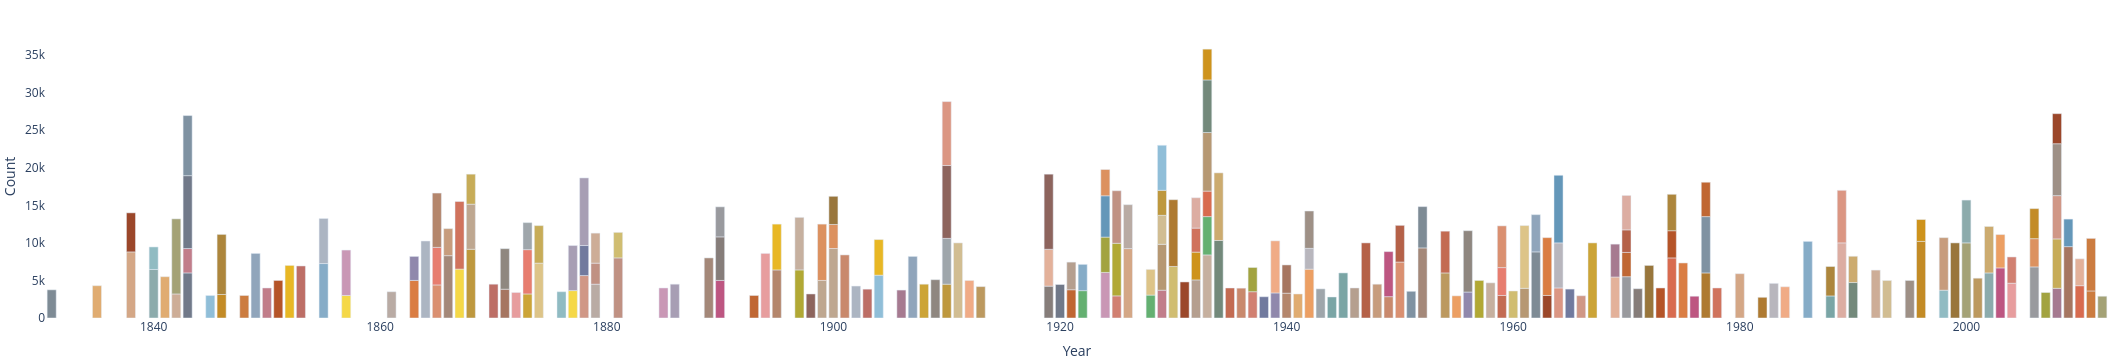

In [54]:
fig = px.bar(mass_cat4, 
             x="year",
             y = "mass (g)",
             opacity = 0.9, 
             color_discrete_sequence = colors
             #title = 'Monthly observations by group over 171 years',
             #labels={"value": "Count", "variable": "Group"}                                                
                )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Year',
    yaxis_title='Count',
    # height=650, width=1500,
    margin=dict(t=35, b=10, l=0, r=5)
)

fig.show()

In [55]:
summary4 = pd.DataFrame({'mass (g)': mass_cat4["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975])}).reset_index(names = 'Statistic')

display(summary4)

print()

# calculate the 97.5th percentile value
percentile_val_75 = mass_cat4['mass (g)'].quantile(0.75)
percentile_val_97 = mass_cat4['mass (g)'].quantile(0.975)

# count the number of values above the 97.5th percentile
num_above_percentile_75 = len(mass_cat4[mass_cat4['mass (g)'] >= percentile_val_75])
num_above_percentile_97 = len(mass_cat4[mass_cat4['mass (g)'] >= percentile_val_97])

print(f"Number of values above or equal to the 75th percentile: {num_above_percentile_75}")
print(f"Number of values above or equal to the 97.5th percentile: {num_above_percentile_97}")

Statistic      mass (g)
0     count    244.000000
1      mean   5399.020082
2       std   2085.629187
3       min   2756.000000
4      2.5%   2900.000000
5       25%   3699.500000
6       50%   4897.500000
7       75%   6874.750000
8     97.5%  10000.000000
9       max  10322.000000


Number of values above or equal to the 75th percentile: 61
Number of values above or equal to the 97.5th percentile: 12


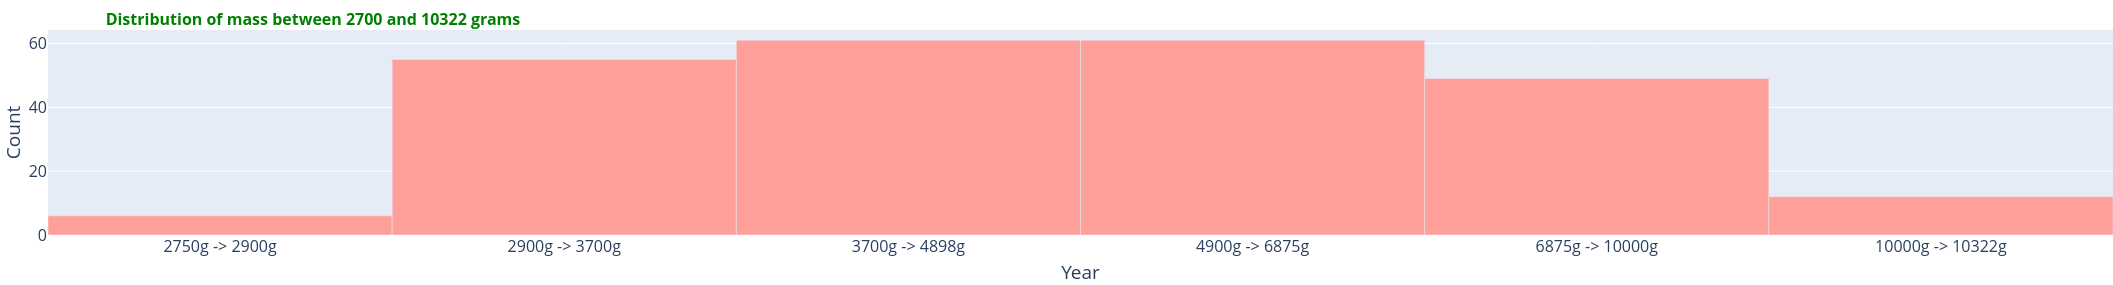

In [65]:
hist, bins = np.histogram(mass_cat4["mass (g)"], bins=[2750, 2900, 3699.5, 4897.5, 6874.75, 10000, 10323])
    
fig = go.Figure(go.Bar(x=[0,1,2,3, 4, 5], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3, 4, 5], ticktext=['2750g -> 2900g', '2900g -> 3700g','3700g -> 4898g','4900g -> 6875g','6875g -> 10000g', '10000g -> 10322g'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 2756 and 10322 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )               

fig.show()

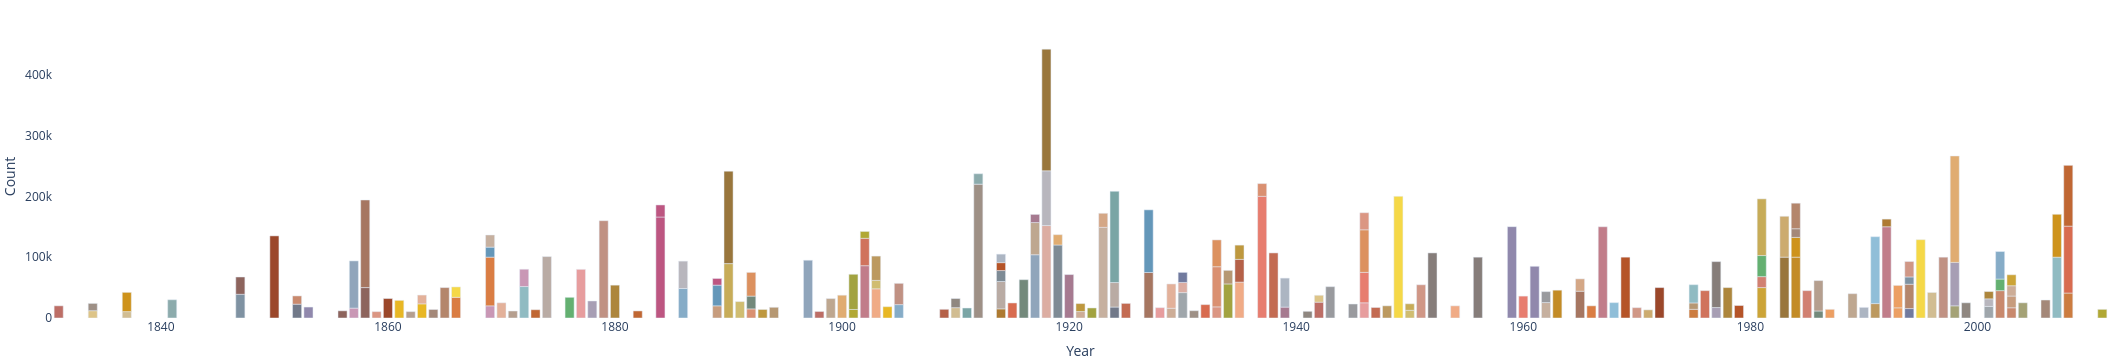

In [57]:
fig = px.bar(mass_cat5, 
             x="year",
             y = "mass (g)",
             opacity = 0.9, 
             color_discrete_sequence = colors
             #title = 'Monthly observations by group over 171 years',
             #labels={"value": "Count", "variable": "Group"}                                                
                )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Year',
    yaxis_title='Count',
    # height=650, width=1500,
    margin=dict(t=35, b=10, l=0, r=5)
)

fig.show()

In [58]:
summary5 = pd.DataFrame({'mass (g)': mass_cat5["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975])}).reset_index(names = 'Statistic')

#display(mass_cat5["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975]))
display(summary5)
print()

# calculate the 97.5th percentile value
percentile_val_75 = mass_cat5['mass (g)'].quantile(0.75)
percentile_val_97 = mass_cat5['mass (g)'].quantile(0.975)

# count the number of values above the 97.5th percentile
num_above_percentile_75 = len(mass_cat5[mass_cat5['mass (g)'] >= percentile_val_75])
num_above_percentile_97 = len(mass_cat5[mass_cat5['mass (g)'] >= percentile_val_97])

print(f"Number of values above or equal to the 75th percentile: {num_above_percentile_75}")
print(f"Number of values above or equal to the 97.5th percentile: {num_above_percentile_97}")

Statistic       mass (g)
0     count     219.000000
1      mean   46199.388128
2       std   43688.533910
3       min   10500.000000
4      2.5%   10772.500000
5       25%   17000.000000
6       50%   28000.000000
7       75%   53450.000000
8     97.5%  163300.000000
9       max  220000.000000


Number of values above or equal to the 75th percentile: 55
Number of values above or equal to the 97.5th percentile: 6


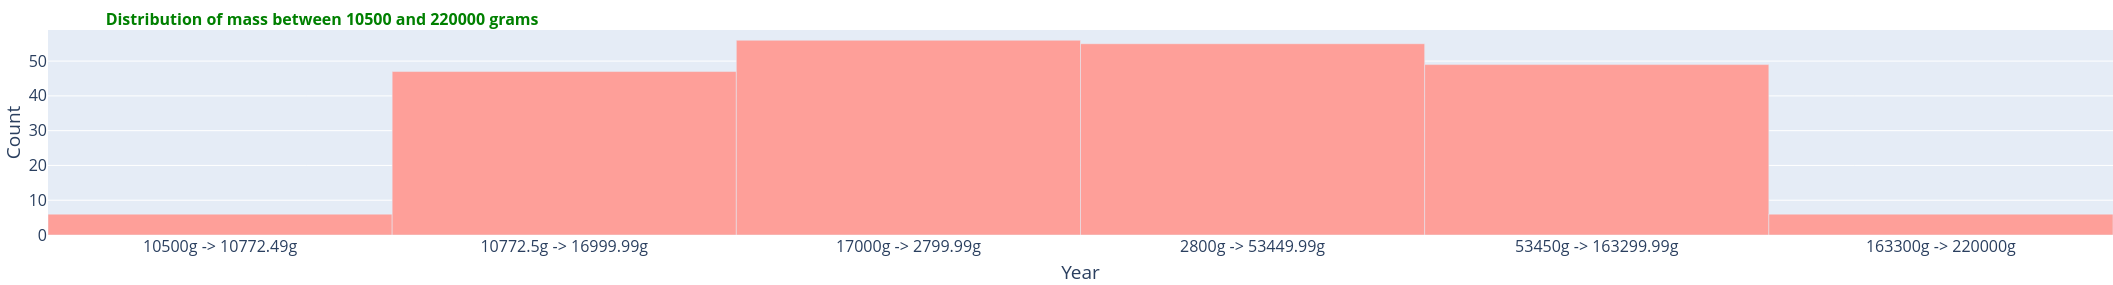

In [63]:
hist, bins = np.histogram(mass_cat5["mass (g)"], bins=[10499, 10772.5, 17000, 28000, 53450, 163300, 220000])
    
fig = go.Figure(go.Bar(x=[0,1,2,3, 4, 5], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3, 4, 5], ticktext=['10500g -> 10772.49g', '10772.5g -> 16999.99g','17000g -> 2799.99g','2800g -> 53449.99g','53450g -> 163299.99g', '163300g -> 220000g'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 10500 and 220000 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )               

fig.show()

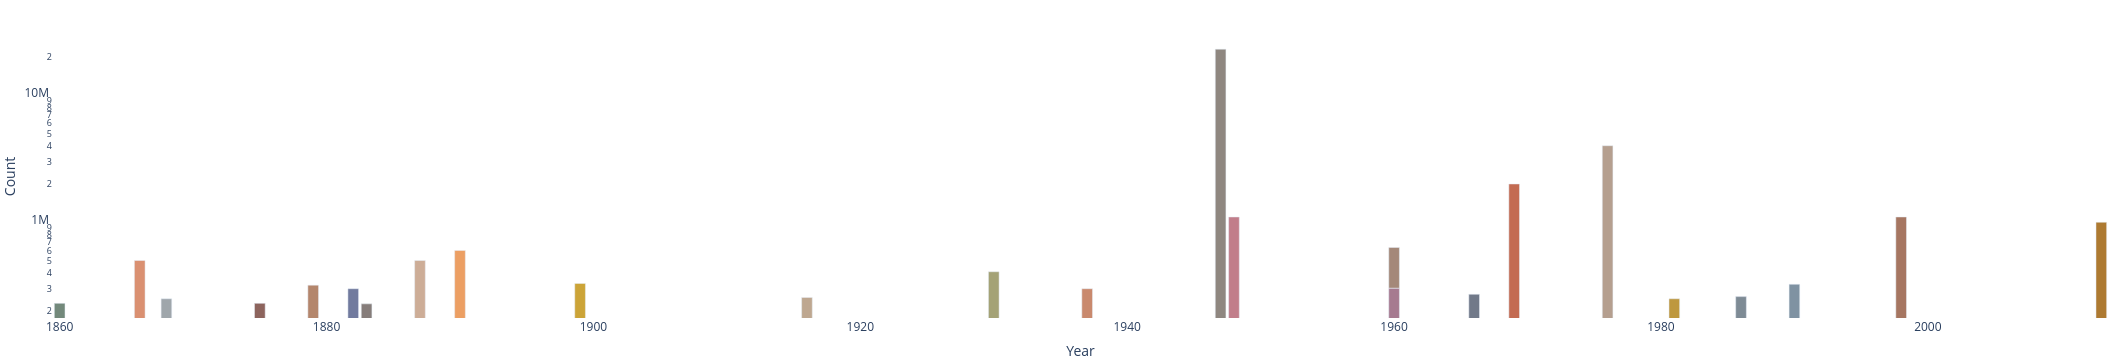

In [54]:
fig = px.bar(mass_cat6, 
             x="year",
             y = "mass (g)",
             log_y = True,
             opacity = 0.9, 
             color_discrete_sequence = colors
             #title = 'Monthly observations by group over 171 years',
             #labels={"value": "Count", "variable": "Group"}                                                
                )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Year',
    yaxis_title='Count',
    # height=650, width=1500,
    margin=dict(t=35, b=10, l=0, r=5)
)

fig.show()

In [79]:
summary6 = pd.DataFrame({'mass (g)': mass_cat6["mass (g)"].describe(percentiles = [.025, .25, .50, .75, 0.975])}).reset_index(names = 'Statistic')

display(summary6)

print()

# calculate the 97.5th percentile value
percentile_val_75 = mass_cat6['mass (g)'].quantile(0.75)
percentile_val_97 = mass_cat6['mass (g)'].quantile(0.975)

# count the number of values above the 97.5th percentile
num_above_percentile_75 = len(mass_cat6[mass_cat6['mass (g)'] >= percentile_val_75])
num_above_percentile_97 = len(mass_cat6[mass_cat6['mass (g)'] >= percentile_val_97])

print(f"Number of values above or equal to the 75th percentile: {num_above_percentile_75}")
print(f"Number of values above or equal to the 97.5th percentile: {num_above_percentile_97}")

Statistic      mass (g)
0     count  2.500000e+01
1      mean  1.535640e+06
2       std  4.544588e+06
3       min  2.280000e+05
4      2.5%  2.292000e+05
5       25%  2.600000e+05
6       50%  3.250000e+05
7       75%  6.000000e+05
8     97.5%  1.160000e+07
9       max  2.300000e+07


Number of values above or equal to the 75th percentile: 7
Number of values above or equal to the 97.5th percentile: 1


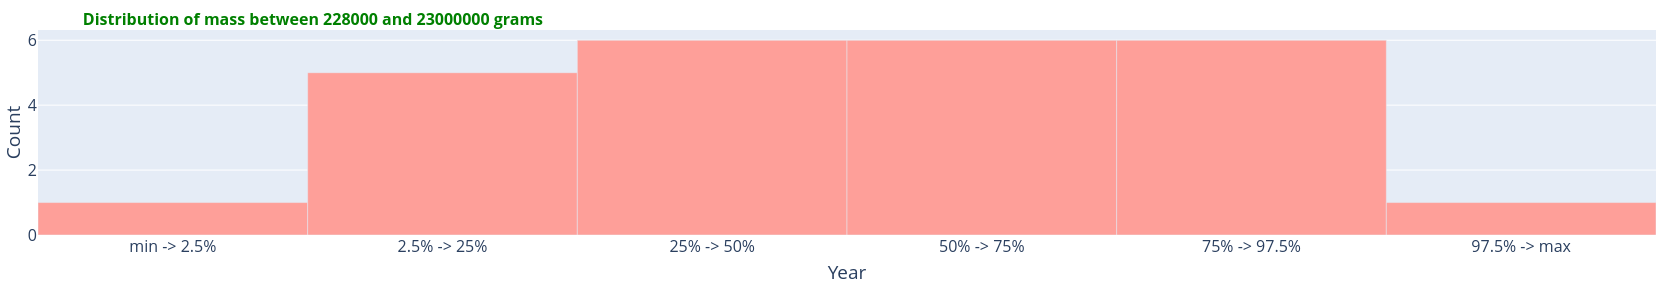

In [71]:
hist, bins = np.histogram(mass_cat6["mass (g)"], bins=[2.280000e+05, 2.292000e+05, 2.600000e+05, 3.250000e+05, 6.000000e+05, 1.160000e+07, 2.300000e+07])
    
fig = go.Figure(go.Bar(x=[0,1,2,3, 4, 5], y=hist, marker_color = "#fe9f99"))

fig.update_xaxes(tickvals=[0,1,2,3, 4, 5], ticktext=['min -> 2.5%', '2.5% -> 25%','25% -> 50%','50% -> 75%','75% -> 97.5%', '97.5% -> max'])
fig.update_layout(bargap=0)

# set the title
fig.update_layout(title=dict(text='<b style="text-align:center">Distribution of mass between 228000 and 23000000 grams</b>'),
                  title_font_color = 'green',
                  title_font_size = 16,
                  title_x = 0.05,
                  title_y = 0.95,
                  font=dict(size=16),
                  xaxis_title='Mass Quantiles',
                  yaxis_title='Count',
                  margin=dict(l=0, r=0, b=20, t = 30),
                  height = 285                  
                 )                           
fig.show()

In [55]:
mass_cat1.head()

name    id       Type group  mass (g)    year  latitude  longitude  \
0       Aachen     1  Chondrite    L5      21.0  1880.0  50.77500    6.08333   
72     Banswal  4937  Chondrite    L5      14.0  1913.0  30.40000   78.20000   
78    Barntrup  4948  Chondrite   LL4      17.0  1886.0  52.00000    9.10000   
104  Bethlehem  5032  Chondrite     H      13.9  1859.0  42.53333  -73.83333   
107     Bhagur  5037  Chondrite    L6      18.0  1877.0  20.88333   74.83333   

           country      continent   range label     mass range  
0          Germany         Europe  1st_quantile  (0.099, 22.0]  
72           India           Asia  1st_quantile  (0.099, 22.0]  
78         Germany         Europe  1st_quantile  (0.099, 22.0]  
104  United States  North America  1st_quantile  (0.099, 22.0]  
107          India           Asia  1st_quantile  (0.099, 22.0]

In [56]:
#Creating dataframes of calculated fields for each mass category

#1
cat1_grouped_by_type_and_group = mass_cat1.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat1_grouped_avg_mass = mass_cat1.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat1_grouped_min_mass = mass_cat1.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat1_grouped_max_mass = mass_cat1.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat1_grouped_by_type_and_group['min mass (g)'] = np.around(cat1_grouped_min_mass['min mass (g)'], decimals = 2)

cat1_grouped_by_type_and_group['avg mass (g)'] = np.around(cat1_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat1_grouped_by_type_and_group['max mass (g)'] = np.around(cat1_grouped_max_mass['max mass (g)'], decimals = 2)

cat1_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat1_grouped_by_type_and_group['count']  / cat1_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat1_grouped_by_type_and_group = cat1_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

#2
cat2_grouped_by_type_and_group = mass_cat2.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat2_grouped_avg_mass = mass_cat2.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat2_grouped_min_mass = mass_cat2.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat2_grouped_max_mass = mass_cat2.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat2_grouped_by_type_and_group['min mass (g)'] = np.around(cat2_grouped_min_mass['min mass (g)'], decimals = 2)

cat2_grouped_by_type_and_group['avg mass (g)'] = np.around(cat2_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat2_grouped_by_type_and_group['max mass (g)'] = np.around(cat2_grouped_max_mass['max mass (g)'], decimals = 2)

cat2_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat2_grouped_by_type_and_group['count']  / cat2_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat2_grouped_by_type_and_group = cat2_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

#3
cat3_grouped_by_type_and_group = mass_cat3.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat3_grouped_avg_mass = mass_cat3.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat3_grouped_min_mass = mass_cat3.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat3_grouped_max_mass = mass_cat3.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat3_grouped_by_type_and_group['min mass (g)'] = np.around(cat3_grouped_min_mass['min mass (g)'], decimals = 2)

cat3_grouped_by_type_and_group['avg mass (g)'] = np.around(cat3_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat3_grouped_by_type_and_group['max mass (g)'] = np.around(cat3_grouped_max_mass['max mass (g)'], decimals = 2)

cat3_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat3_grouped_by_type_and_group['count']  / cat3_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat3_grouped_by_type_and_group = cat3_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

#4
cat4_grouped_by_type_and_group = mass_cat4.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat4_grouped_avg_mass = mass_cat4.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat4_grouped_min_mass = mass_cat4.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat4_grouped_max_mass = mass_cat4.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat4_grouped_by_type_and_group['min mass (g)'] = np.around(cat4_grouped_min_mass['min mass (g)'], decimals = 2)

cat4_grouped_by_type_and_group['avg mass (g)'] = np.around(cat4_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat4_grouped_by_type_and_group['max mass (g)'] = np.around(cat4_grouped_max_mass['max mass (g)'], decimals = 2)

cat4_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat4_grouped_by_type_and_group['count']  / cat4_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat4_grouped_by_type_and_group = cat4_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

#5
cat5_grouped_by_type_and_group = mass_cat5.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat5_grouped_avg_mass = mass_cat5.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat5_grouped_min_mass = mass_cat5.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat5_grouped_max_mass = mass_cat5.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat5_grouped_by_type_and_group['min mass (g)'] = np.around(cat5_grouped_min_mass['min mass (g)'], decimals = 2)

cat5_grouped_by_type_and_group['avg mass (g)'] = np.around(cat5_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat5_grouped_by_type_and_group['max mass (g)'] = np.around(cat5_grouped_max_mass['max mass (g)'], decimals = 2)

cat5_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat5_grouped_by_type_and_group['count']  / cat5_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat5_grouped_by_type_and_group = cat5_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

#6
cat6_grouped_by_type_and_group = mass_cat6.groupby(["Type", "group"])["name"].count().reset_index(name = 'count')

cat6_grouped_avg_mass = mass_cat6.groupby(["Type", "group"])["mass (g)"].mean().reset_index(name = 'avg mass (g)')

cat6_grouped_min_mass = mass_cat6.groupby(["Type", "group"])["mass (g)"].min().reset_index(name = 'min mass (g)')

cat6_grouped_max_mass = mass_cat6.groupby(["Type", "group"])["mass (g)"].max().reset_index(name = 'max mass (g)')

cat6_grouped_by_type_and_group['min mass (g)'] = np.around(cat6_grouped_min_mass['min mass (g)'], decimals = 2)

cat6_grouped_by_type_and_group['avg mass (g)'] = np.around(cat6_grouped_avg_mass['avg mass (g)'], decimals = 2)

cat6_grouped_by_type_and_group['max mass (g)'] = np.around(cat6_grouped_max_mass['max mass (g)'], decimals = 2)

cat6_grouped_by_type_and_group['percentage[%]'] = np.around(100 * cat6_grouped_by_type_and_group['count']  / cat6_grouped_by_type_and_group['count'].sum(), decimals = 2)

cat6_grouped_by_type_and_group = cat6_grouped_by_type_and_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)


In [57]:
display(cat1_grouped_by_type_and_group.head(15))
display(cat2_grouped_by_type_and_group.head(15))
display(cat3_grouped_by_type_and_group.head(15))
display(cat4_grouped_by_type_and_group.head(15))
display(cat5_grouped_by_type_and_group.head(15))
display(cat6_grouped_by_type_and_group.head(15))

Type           group  count  min mass (g)  avg mass (g)  \
0      Chondrite              H5      5          4.00         16.62   
1      Chondrite              L5      4          0.10          8.98   
2      Chondrite              L6      3          3.30          8.77   
3      Chondrite             CI1      2          1.00          4.35   
4      Chondrite              H6      2          6.10         14.05   
5      Chondrite             LL6      2          3.30          5.65   
6   Unclassified      Stone-uncl      2          0.10          0.75   
7     Achondrite  Achondrite-ung      1          0.15          0.15   
8     Achondrite      Eucrite-cm      1         20.00         20.00   
9      Chondrite               H      1         13.90         13.90   
10     Chondrite           LL3.4      1         13.10         13.10   
11     Chondrite             LL4      1         17.00         17.00   
12     Chondrite             LL5      1          2.00          2.00   
13  Unclassified            Iron      1         12.00         12.00   

    max mass (g)  percentage[%]  
0          22.00          18.52  
1          21.00          14.81  
2          18.00          11.11  
3           7.70           7.41  
4          22.00           7.41  
5           8.00           7.41  
6           1.40           7.41  
7           0.15           3.70  
8          20.00           3.70  
9          13.90           3.70  
10         13.10           3.70  
11         17.00           3.70  
12          2.00           3.70  
13         12.00           3.70

Type          group  count  min mass (g)  avg mass (g)  \
0      Chondrite             L6     51         25.00        306.87   
1      Chondrite             H5     28         23.00        292.04   
2      Chondrite             H6     19         56.00        304.17   
3      Chondrite             L5     14         28.90        326.02   
4      Chondrite            LL6     10         36.10        405.14   
5      Chondrite            CM2      9         25.81        223.31   
6      Chondrite             H4      9        177.00        374.16   
7      Chondrite             OC      8         72.90        254.55   
8     Achondrite      Howardite      7         30.00        252.17   
9     Achondrite  Eucrite-mmict      5         97.70        170.84   
10     Chondrite              H      5         37.00        222.22   
11     Chondrite             L4      5        113.40        213.38   
12     Chondrite              L      3         76.50        433.83   
13  Unclassified     Stone-uncl      3         72.00        348.33   
14     Chondrite             L3      2        135.00        367.50   

    max mass (g)  percentage[%]  
0          680.0          23.39  
1          682.0          12.84  
2          680.0           8.72  
3          630.0           6.42  
4          680.5           4.59  
5          629.0           4.13  
6          560.0           4.13  
7          550.0           3.67  
8          650.0           3.21  
9          252.0           2.29  
10         470.0           2.29  
11         400.0           2.29  
12         625.0           1.38  
13         642.0           1.38  
14         600.0           0.92

Type          group  count  min mass (g)  avg mass (g)  \
0              Chondrite             L6     58         700.0       1361.33   
1              Chondrite             H5     40         690.0       1521.17   
2              Chondrite             H6     18         720.0       1564.31   
3              Chondrite             L5     13         705.0       1698.62   
4              Chondrite             H4     10         927.0       1449.26   
5           Unclassified     Stone-uncl      9         910.0       1786.78   
6              Chondrite             OC      7         845.2       1260.60   
7              Chondrite            LL6      7         840.0       1474.07   
8              Chondrite            LL5      6         700.0       1170.83   
9             Achondrite  Eucrite-mmict      5         750.0       1382.00   
10  Primitive Achondrite       Ureilite      4         700.0       1261.00   
11            Achondrite     Eucrite-cm      4        1303.8       1601.20   
12            Achondrite      Howardite      4         780.0       1688.00   
13             Chondrite              L      3         762.0       1067.33   
14            Achondrite    Iron, IIIAB      3         737.6       1416.53   

    max mass (g)  percentage[%]  
0         2500.0          23.77  
1         2587.0          16.39  
2         2700.0           7.38  
3         2500.0           5.33  
4         2500.0           4.10  
5         2700.0           3.69  
6         1900.0           2.87  
7         2220.0           2.87  
8         2000.0           2.46  
9         2500.0           2.05  
10        1900.0           1.64  
11        1880.0           1.64  
12        2500.0           1.64  
13        1440.0           1.23  
14        2462.0           1.23

Type        group  count  min mass (g)  avg mass (g)  max mass (g)  \
0    Chondrite           L6     65        2756.0       5177.66       10250.0   
1    Chondrite           H5     39        2900.0       4986.21        8400.0   
2    Chondrite           H6     20        2799.0       5036.55       10000.0   
3    Chondrite           L5     19        3000.0       5845.26        9241.0   
4    Chondrite           H4     14        2936.0       6318.86        9330.0   
5    Chondrite          LL6      9        2840.0       5696.67        8400.0   
6    Chondrite           L4      6        3300.0       5449.50        7000.0   
7    Chondrite          CV3      4        3000.0       4075.00        5300.0   
8   Achondrite      Aubrite      4        3200.0       4360.75        6000.0   
9    Chondrite            H      3        3000.0       4486.67        6510.0   
10   Chondrite          CM2      3        4000.0       5733.33        8000.0   
11  Achondrite  Iron, IIIAB      2        3500.0       3710.00        3920.0   
12  Achondrite   Iron, IIAB      2        4742.0       7471.00       10200.0   
13   Chondrite        LL3.4      2        3555.0       5877.50        8200.0   
14   Chondrite         H3-5      2        3396.0       6798.00       10200.0   

    percentage[%]  
0           26.64  
1           15.98  
2            8.20  
3            7.79  
4            5.74  
5            3.69  
6            2.46  
7            1.64  
8            1.64  
9            1.23  
10           1.23  
11           0.82  
12           0.82  
13           0.82  
14           0.82

Type        group  count  min mass (g)  avg mass (g)  max mass (g)  \
0    Chondrite           L6     49       10500.0      42699.88      200000.0   
1    Chondrite           H5     36       10500.0      48503.94      152000.0   
2    Chondrite           L5     21       10500.0      37298.33      110000.0   
3    Chondrite           H6     20       11300.0      48188.50      166000.0   
4    Chondrite           H4     12       10500.0      44327.50      152000.0   
5    Chondrite          LL6     11       11500.0      31254.55      110000.0   
6    Chondrite           L4      4       12000.0      70625.00      200000.0   
7    Chondrite         H4/5      4       31650.0      45525.00       70500.0   
8    Chondrite          EL6      3       13600.0      16950.00       23250.0   
9    Chondrite          LL5      3       16500.0      65500.00      150000.0   
10  Achondrite  Iron, IIIAB      3       25250.0      52916.67       85000.0   
11  Achondrite    Diogenite      3       12000.0      25766.67       40300.0   
12  Achondrite      Aubrite      2       17000.0      43500.00       70000.0   
13   Chondrite         H3.8      2       12000.0      28500.00       45000.0   
14   Chondrite        L/LL6      2       25000.0     122500.00      220000.0   

    percentage[%]  
0           22.37  
1           16.44  
2            9.59  
3            9.13  
4            5.48  
5            5.02  
6            1.83  
7            1.83  
8            1.37  
9            1.37  
10           1.37  
11           1.37  
12           0.91  
13           0.91  
14           0.91

Type              group  count  min mass (g)  avg mass (g)  \
0    Chondrite                 L6      5      228000.0     264200.00   
1    Chondrite                 H5      3      250000.0    1783333.33   
2   Achondrite         Iron, IIAB      2      256000.0   11628000.00   
3   Achondrite        Iron, IIIAB      2      325000.0     462500.00   
4    Chondrite                LL5      2      408000.0     704000.00   
5   Achondrite            Aubrite      1     1100000.0    1100000.00   
6   Achondrite      Eucrite-mmict      1      330000.0     330000.00   
7   Achondrite  Mesosiderite-A3/4      1      320000.0     320000.00   
8   Achondrite     Pallasite, PMG      1      250000.0     250000.00   
9    Chondrite                CV3      1     2000000.0    2000000.00   
10   Chondrite                 H4      1      500000.0     500000.00   
11   Chondrite              L/LL4      1      330000.0     330000.00   
12   Chondrite              L/LL5      1      500000.0     500000.00   
13   Chondrite                 L5      1      230000.0     230000.00   
14   Chondrite               L5-6      1      300000.0     300000.00   

    max mass (g)  percentage[%]  
0       303000.0           20.0  
1      4000000.0           12.0  
2     23000000.0            8.0  
3       600000.0            8.0  
4      1000000.0            8.0  
5      1100000.0            4.0  
6       330000.0            4.0  
7       320000.0            4.0  
8       250000.0            4.0  
9      2000000.0            4.0  
10      500000.0            4.0  
11      330000.0            4.0  
12      500000.0            4.0  
13      230000.0            4.0  
14      300000.0            4.0

In [58]:


type_colors = ['rgb(199, 110, 44)', 'rgb(221, 164, 98)', 'rgb(182, 95, 86)', 'rgb(199, 155, 34)', 'rgb(175, 141, 100)', 'rgb(216, 139, 118)', 'rgb(205, 182, 135)', 
               'rgb(224, 169, 144)', 'rgb(189, 91, 64)', 'rgb(100, 125, 109)', 'rgb(169, 118, 88)', 'rgb(228, 158, 124)', 'rgb(135, 148, 168)', 'rgb(173, 149, 131)', 
               'rgb(208, 158, 122)', 'rgb(169, 165, 166)', 'rgb(196, 140, 174)', 'rgb(212, 92, 60)', 'rgb(186, 87, 29)', 'rgb(142, 104, 40)', 'rgb(218, 190, 124)', 
               'rgb(143, 144, 148)', 'rgb(155, 124, 107)', 'rgb(178, 163, 155)', 'rgb(217, 134, 78)', 'rgb(145, 52, 19)', 'rgb(172, 121, 93)', 'rgb(181, 145, 51)', 
               'rgb(215, 112, 47)', 'rgb(177, 169, 173)', 'rgb(98, 108, 148)', 'rgb(183, 176, 177)', 'rgb(98, 107, 125)', 'rgb(196, 125, 94)', 'rgb(154, 174, 191)', 
               'rgb(244, 212, 52)', 'rgb(194, 164, 71)', 'rgb(184, 132, 68)', 'rgb(199, 90, 89)', 'rgb(229, 111, 96)', 'rgb(234, 149, 83)', 'rgb(157, 104, 80)', 
               'rgb(192, 168, 149)', 'rgb(132, 184, 212)', 'rgb(158, 148, 172)', 'rgb(181, 142, 78)', 'rgb(201, 136, 4)', 'rgb(140, 175, 207)', 'rgb(149, 157, 162)', 
               'rgb(190, 159, 92)', 'rgb(165, 122, 40)', 'rgb(122, 112, 108)', 'rgb(184, 158, 133)', 'rgb(172, 85, 57)', 'rgb(217, 165, 152)', 'rgb(228, 140, 135)', 
               'rgb(185, 119, 4)', 'rgb(164, 173, 188)', 'rgb(199, 162, 96)', 'rgb(150, 123, 42)', 'rgb(84, 140, 178)', 'rgb(200, 135, 119)', 'rgb(128, 163, 164)', 
               'rgb(189, 127, 15)', 'rgb(169, 85, 58)', 'rgb(141, 129, 120)', 'rgb(173, 80, 53)', 'rgb(215, 124, 54)', 'rgb(131, 123, 115)', 'rgb(125, 130, 136)', 
               'rgb(175, 170, 179)', 'rgb(166, 121, 98)', 'rgb(145, 50, 28)', 'rgb(166, 108, 27)', 'rgb(157, 108, 132)', 'rgb(132, 156, 180)', 'rgb(204, 100, 76)', 
               'rgb(129, 84, 76)', 'rgb(169, 159, 31)', 'rgb(177, 175, 182)', 'rgb(146, 173, 175)', 'rgb(113, 127, 138)', 'rgb(152, 122, 112)', 'rgb(153, 154, 44)', 
               'rgb(155, 152, 104)', 'rgb(114, 135, 152)', 'rgb(143, 167, 188)', 'rgb(121, 164, 194)', 'rgb(84, 168, 98)', 'rgb(148, 133, 121)', 'rgb(192, 171, 151)', 
               'rgb(204, 140, 122)', 'rgb(161, 188, 187)', 'rgb(132, 180, 188)', 'rgb(214, 133, 98)', 'rgb(187, 112, 126)', 'rgb(196, 116, 87)', 'rgb(174, 66, 17)', 
               'rgb(149, 108, 86)', 'rgb(230, 176, 13)', 'rgb(186, 134, 118)', 'rgb(108, 156, 156)', 'rgb(204, 182, 98)', 'rgb(239, 163, 122)', 'rgb(183, 141, 42)', 
               'rgb(132, 124, 164)', 'rgb(205, 115, 98)', 'rgb(194, 153, 143)', 'rgb(174, 98, 78)', 'rgb(193, 146, 111)', 'rgb(229, 147, 148)', 'rgb(200, 165, 140)', 
               'rgb(182, 68, 116)', 'rgb(210, 129, 116)']

# from random import shuffle

# #color shuffler 
# shuffle(type_colors)
# # new_achondrite_colors = colors
# print(type_colors)

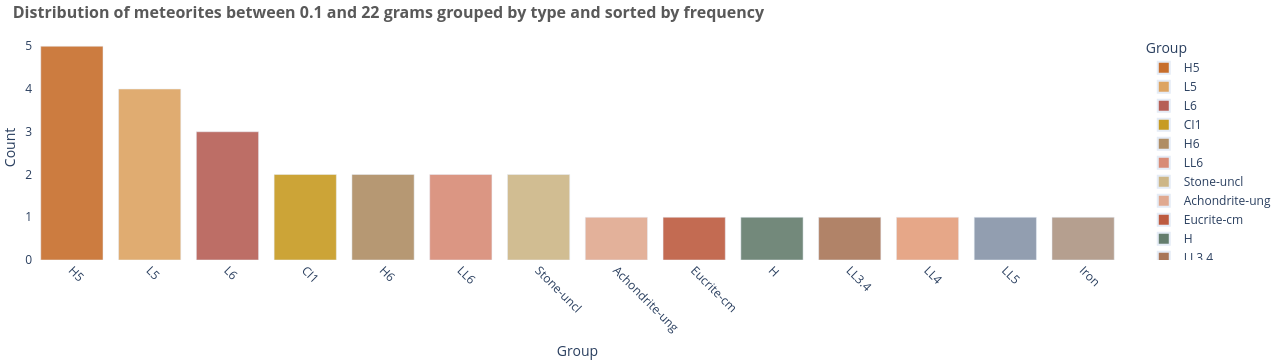

In [59]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat1_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat1_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat1_grouped_by_type_and_group["group"],
             opacity = 0.9,             
            )
fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 0.1 and 22 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

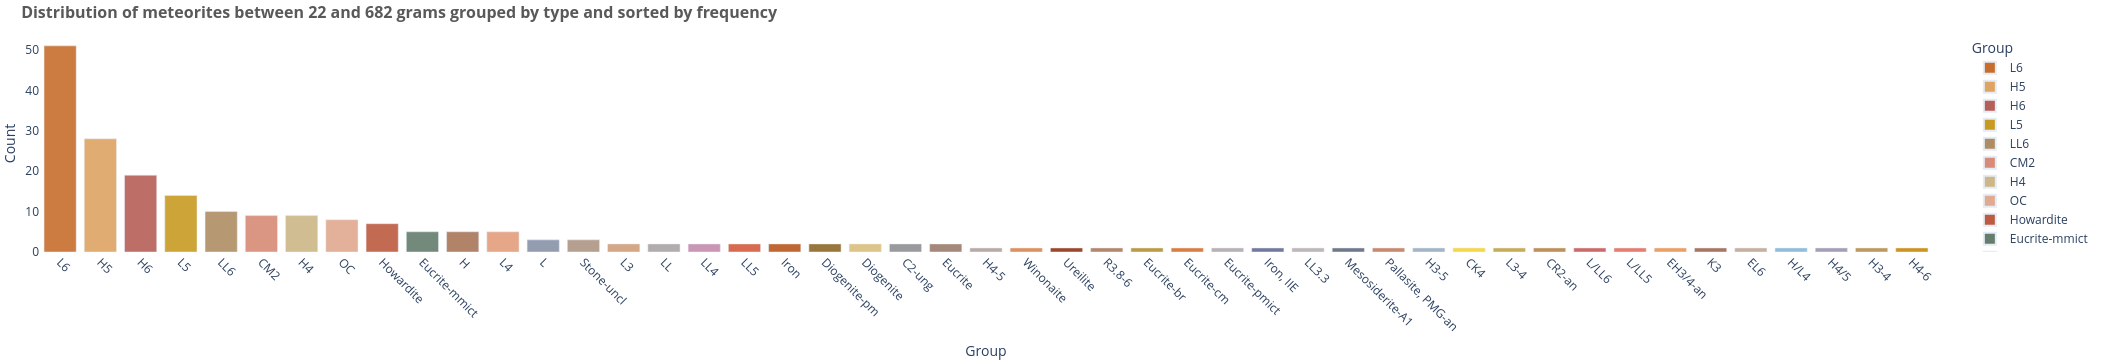

In [60]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat2_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat2_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat2_grouped_by_type_and_group["group"],
             opacity = 0.9,            
            )
fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 22 and 682 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

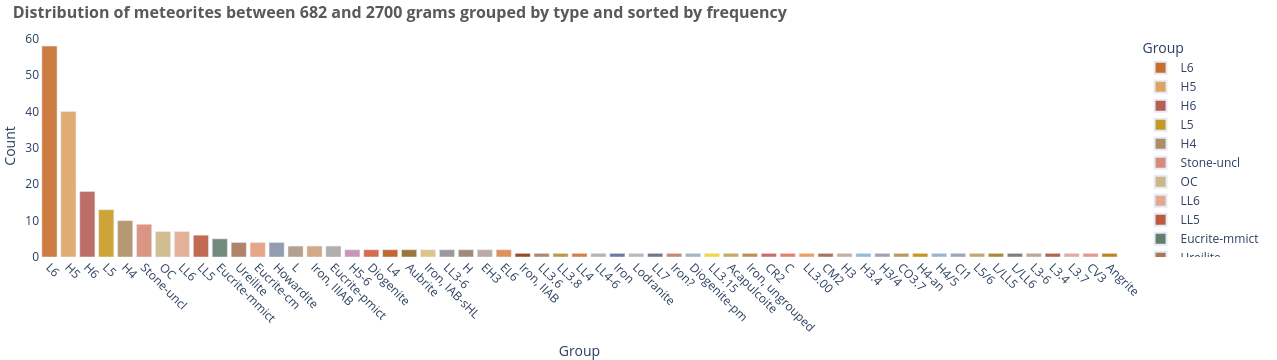

In [61]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat3_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat3_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat3_grouped_by_type_and_group["group"],
             opacity = 0.9,            
            )
fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 682 and 2700 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

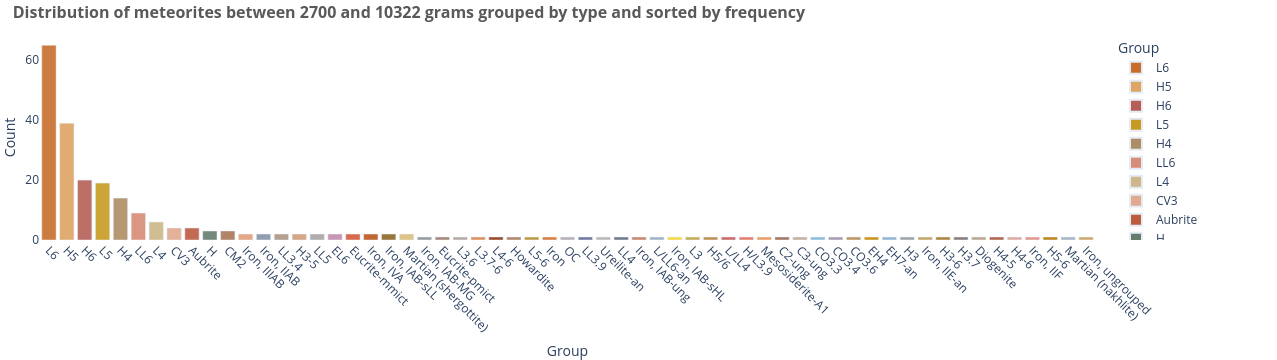

In [62]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat4_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat4_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat4_grouped_by_type_and_group["group"],
             opacity = 0.9,            
            )
fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 2700 and 10322 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

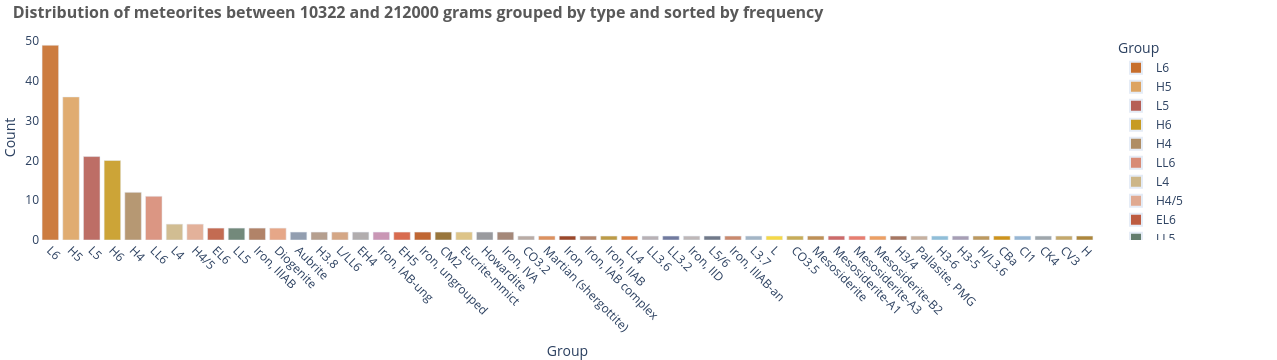

In [63]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat5_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat5_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat5_grouped_by_type_and_group["group"],
             opacity = 0.9,             
            )
fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 10322 and 212000 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

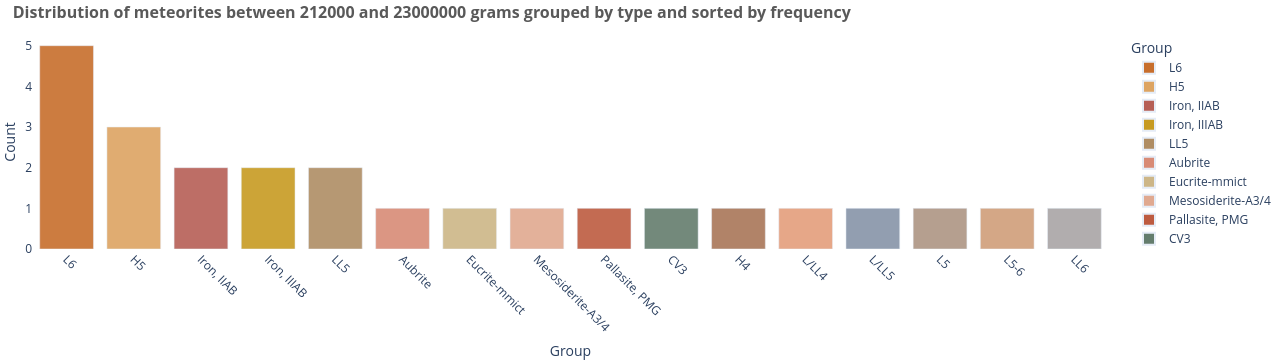

In [64]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(cat6_grouped_by_type_and_group['group'].values, type_colors)}

fig = px.bar(cat6_grouped_by_type_and_group, x="group", y="count",
             color_discrete_map = color_map,
             hover_data=['group', 'Type', 'count', 'min mass (g)', 'avg mass (g)', 'max mass (g)', 'percentage[%]'],
             labels={'group': 'Group','Type':'Type','count':'Count', 'min mass (g)': 'Minimum Mass(grams)', 
                     'avg mass (g)': 'Average Mass(grams)', 'max mass (g)': 'Maximum Mass(grams)', 'percentage[%]':'Percentage'},
             color = cat6_grouped_by_type_and_group["group"],
             opacity = 0.9,             
            )

fig.update_xaxes(tickangle=45)

fig.update_layout(   
        {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
        title=dict(text='<b>Distribution of meteorites between 212000 and 23000000 grams grouped by type and sorted by frequency </b>'),
        title_font_color='rgb(89, 89, 89)',
        title_font_size=16,
        title_x = 0.01,     
        xaxis_title='Group',
        yaxis_title='Count',                
        margin=dict(t=35, b=10, l=0, r=5),
        showlegend = True,
        legend = dict(
            itemsizing='constant',  # Use a constant item size for the legend markers
            itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
            traceorder='normal',  # Set the trace order to normal
            tracegroupgap=10,  # Adjust the gap between legend items        
            itemdoubleclick='toggle'  # Enable double-click behavior on legend items
            ),
    )


fig.show()

In [65]:
print(cat1_grouped_by_type_and_group.shape[0])
print(cat2_grouped_by_type_and_group.shape[0])
print(cat3_grouped_by_type_and_group.shape[0])
print(cat4_grouped_by_type_and_group.shape[0])
print(cat5_grouped_by_type_and_group.shape[0])
print(cat6_grouped_by_type_and_group.shape[0])

14
47
57
59
51
16


In [66]:
print(cat1_grouped_by_type_and_group['count'].sum())
print(cat2_grouped_by_type_and_group['count'].sum())
print(cat3_grouped_by_type_and_group['count'].sum())
print(cat4_grouped_by_type_and_group['count'].sum())
print(cat5_grouped_by_type_and_group['count'].sum())
print(cat6_grouped_by_type_and_group['count'].sum())

27
218
244
244
219
25


In [67]:
len(type_colors)

114

In [68]:
#limit the color list to include only the necessary amount of colors
# size desired
k = 59
 
# using pop()
# to truncate list
n = len(type_colors)
for i in range(0, n - k ):
    type_colors.pop()
    
print(type_colors)

['rgb(199, 110, 44)', 'rgb(221, 164, 98)', 'rgb(182, 95, 86)', 'rgb(199, 155, 34)', 'rgb(175, 141, 100)', 'rgb(216, 139, 118)', 'rgb(205, 182, 135)', 'rgb(224, 169, 144)', 'rgb(189, 91, 64)', 'rgb(100, 125, 109)', 'rgb(169, 118, 88)', 'rgb(228, 158, 124)', 'rgb(135, 148, 168)', 'rgb(173, 149, 131)', 'rgb(208, 158, 122)', 'rgb(169, 165, 166)', 'rgb(196, 140, 174)', 'rgb(212, 92, 60)', 'rgb(186, 87, 29)', 'rgb(142, 104, 40)', 'rgb(218, 190, 124)', 'rgb(143, 144, 148)', 'rgb(155, 124, 107)', 'rgb(178, 163, 155)', 'rgb(217, 134, 78)', 'rgb(145, 52, 19)', 'rgb(172, 121, 93)', 'rgb(181, 145, 51)', 'rgb(215, 112, 47)', 'rgb(177, 169, 173)', 'rgb(98, 108, 148)', 'rgb(183, 176, 177)', 'rgb(98, 107, 125)', 'rgb(196, 125, 94)', 'rgb(154, 174, 191)', 'rgb(244, 212, 52)', 'rgb(194, 164, 71)', 'rgb(184, 132, 68)', 'rgb(199, 90, 89)', 'rgb(229, 111, 96)', 'rgb(234, 149, 83)', 'rgb(157, 104, 80)', 'rgb(192, 168, 149)', 'rgb(132, 184, 212)', 'rgb(158, 148, 172)', 'rgb(181, 142, 78)', 'rgb(201, 136, 4)'

In [70]:
cat1_grouped_by_type_and_group.head()

Type group  count  min mass (g)  avg mass (g)  max mass (g)  \
0  Chondrite    H5      5           4.0         16.62          22.0   
1  Chondrite    L5      4           0.1          8.98          21.0   
2  Chondrite    L6      3           3.3          8.77          18.0   
3  Chondrite   CI1      2           1.0          4.35           7.7   
4  Chondrite    H6      2           6.1         14.05          22.0   

   percentage[%]  
0          18.52  
1          14.81  
2          11.11  
3           7.41  
4           7.41

In [71]:
cat1_grouped_by_type_and_group["group"].nunique()

14